# T018 · Automated pipeline for lead optimization

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- Armin Ariamajd, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Melanie Vogel, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Corey Taylor, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

In this talktorial, we will learn how to develop an **automated structure-based virtual screening pipeline**. 
The pipeline is **particularly suited for the hit expansion and lead optimization** phases of a drug discovery project, where a promising ligand (i.e. an initial hit or lead compound) needs to be structurally modified in order to improve its binding affinity and selectivity for the target protein. The general architecture of the pipeline can thus be summarized as follows (Figure 1).

* **Input**
    * Target protein structure and a promising ligand (e.g. lead or hit compound), plus specifications of the processes that need to be performed.
      
      
* **Processes**
    * Detection of the most druggable binding site for the given protein structure.
    * Finding derivatives and structural analogs for the ligand, and filtering them based on drug-likeness. 
    * Performing docking calculations on the detected protein binding site using the selected analogs.
    * Analyzing and vizualizing predicted protein–ligand interactions and binding modes for each analog.
    
    
* **Output**
    * New ligand structure(s) optimized for affinity, selectivity and drug-likeness.

![Pipeline overview](images/sb_vs_pipeline.png)

*Figure 1*: General architecture of the automated structure-based virtual screening pipeline.

<a id='#Contents-in-Theory'></a>

### Contents in [*Theory*](#Theory)

- [Drug design pipeline](#Drug-design-pipeline)
- [Protein binding site](#Protein-binding-site) 
- [Chemical similarity search](#Chemical-similarity-search)
- [Molecular docking](#Molecular-docking)
- [Protein&mdash;ligand interactions](#Protein&mdash;ligand-interactions)
- [Visual inspection of docking results](#Visual-inspection-of-docking-results)

[comment]: <> (If you change a title, you must update the TOC label, to make cross-references functional on our website!)

<a id='Contents-in-Practical'></a>

### Contents in [*Practical*](#Practical)

- [Outline of the virtual screening pipeline](#Outline-of-the-virtual-screening-pipeline)
- [Creating a new project](#Creating-a-new-project)
- [The input data](#The-input-data)
- [Processing the input protein data](#Processing-the-input-protein-data)
- [Processing the input ligand data](#Processing-the-input-ligand-data)
- [Binding site detection](#Binding-site-detection)
- [Ligand similarity search](#Ligand-similarity-search)
- [Docking calculations](#Docking-calculations)
- [Analysis of protein&mdash;ligand interactions](#Analysis-of-protein&mdash;ligand-interactions)
- [Selection of the best analog](#Selection-of-the-best-analog)
- [Putting the pieces together: A fully automated pipeline](#Putting-the-pieces-together:-A-fully-automated-pipeline)

[comment]: <> (If you change a title, you must update the TOC label, to make cross-references functional on our website!)

### References

*Note:* due to the extensive references in each category, details are hidden by default.

<details>

<summary>Click here for a complete list of references.</summary>

* **TeachOpenCADD teaching platform**
    
    1. Journal article on *TeachOpenCADD* teaching platform for computer-aided drug design: [D. Sydow *et al.*, *J. Cheminform.* **2019**, 11, 29.](https://doi.org/10.1186/s13321-019-0351-x)
    
    2. [*TeachOpenCADD* website](https://projects.volkamerlab.org/teachopencadd/index.html) at [Volkamer lab](https://volkamerlab.org/)
    
    3. This talktorial is inspired by the *TeachOpenCADD* talktorials T013-T017

    
* **Drug design pipeline**
    
    4. Book on drug design: [*G. Klebe*, *Drug Design*, Springer, **2013**.](https://doi.org/10.1007/978-3-642-17907-5)
    
    5. Review article on early stages of drug discovery: [J. P. Hughes *et al.*, *Br. J. Pharmacol.* **2011**, 162, 1239-1249.](https://doi.org/10.1111/j.1476-5381.2010.01127.x)
    
    6. Review article on computational drug design: [G. Sliwoski *et al.*, *Pharmacol. Rev.* **2014**, 66, 334-395.](https://doi.org/10.1124/pr.112.007336)
    
    7. Review article on computational drug discovery: [S. P. Leelananda *et al.*, *Beilstein J. Org. Chem.* **2016**, 12, 2694-2718.](https://doi.org/10.3762/bjoc.12.267)
    
    8. Review article on free software for building a virtual screening pipeline: [E. Glaab, *Brief. Bioinform.* **2016**, 17, 352-366.](https://doi.org/10.1093/bib/bbv037)
    
    9. Review article on automating drug discovery: [G. Schneider, *Nat. Rev. Drug Discov.* **2018**, 17, 97-113.](https://doi.org/10.1038/nrd.2017.232)
    
    10. Review article on structure-based drug discovery: [M. Batool *et al.*, *Int. J. Mol. Sci.* **2019**, 20, 2783.](https://doi.org/10.3390/ijms20112783)

    
* **Binding site detection**
    
    11. Book chapter on prediction and analysis of binding sites: [A. Volkamer *et al.*, *Applied Chemoinformatics*, Wiley, **2018**, pp. 283-311.](https://doi.org/10.1002/9783527806539.ch6g)
    
    12. Journal article on binding site and druggability predictions using *DoGSiteScorer*: [A. Volkamer *et al.*, *J. Chem. Inf. Model.* **2012**, *52*, 360-372.](https://doi.org/10.1021/ci200454v)
    
    13. Journal article describing the *ProteinsPlus* web-portal: [R. Fahrrolfes *et al.*, *Nucleic Acids Res.* **2017**, 45, W337-W343.](https://doi.org/10.1093/nar/gkx333)
    
    14. [*ProteinsPlus* website](https://proteins.plus/), and information regarding the usage of its *DoGSiteScorer* [REST-API](https://proteins.plus/help/dogsite_rest)
    
    15. *TeachOpenCADD* talktorial on binding site detection: [Talktorial T014](https://projects.volkamerlab.org/teachopencadd/talktorials/T014_binding_site_detection.html)
    
    16. *TeachOpenCADD* talktorial on querying online API web-services: [Talktorial T011](https://projects.volkamerlab.org/teachopencadd/talktorials/T011_query_online_api_webservices.html)

    
* **Chemical similarity search and molecular fingerprints**
    
    17. Review article on molecular similarity in medicinal chemistry: [G. Maggiora *et al.*, *J. Med. Chem.* **2014**, 57, 3186-3204.](https://doi.org/10.1021/jm401411z)
    
    18. Review article on molecular fingerprint similarity search: [A. Cereto-Massague *et al.*, *Methods* **2015**, 71, 58-63.](https://doi.org/10.1016/j.ymeth.2014.08.005)
    
    19. Review article on molecular fingerprints in virtual screening: [I. Muegge *et al.*, *Expert Opin. Drug Discov. **2016**, 11, 137-148.](https://doi.org/10.1517/17460441.2016.1117070)
    
    20. Journal article on extended-connectivity fingerprints (ECFPs): [D. Rogers *et al.*, *J. Chem. Inf. Model.* **2010**, 50, 742-754.](https://doi.org/10.1021/ci100050t)
    
    21. Journal article on *Morgan* algorithm: [H. L. Morgan, *J. Chem. Doc.* **2002**, 5, 107-113.](https://doi.org/10.1021/c160017a018)
    
    22. Journal article on Molecular ACCess Systems (MACCS) keys fingerprint: [J. L. Durant *et al.*, J. Chem. Inf. Comput. Sci. **2002**, 42, 1273-1280.](https://doi.org/10.1021/ci010132r)
    
    23. Journal article describing the latest developments of the *PubChem* web-services: [S. Kim *et al.*, *Nucleic Acids Res.* **2019**, 47, D1102-D1109.](https://doi.org/10.1093/nar/gky1033)
    
    24. [*PubChem* website](https://pubchem.ncbi.nlm.nih.gov/), and information regarding the usage of its [APIs](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access)
    
    25. Description of *PubChem*'s [custom substructure fingerprint](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) and [*Tanimoto* similarity measure](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1) used in its similarity search engine.  
    
    26. *TeachOpenCADD* talktorial on compound similarity: [Talktorial T004](https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html)
    
    27. *TeachOpenCADD* talktorial on data acquisition from *PubChem*: [Talktorial T013](https://projects.volkamerlab.org/teachopencadd/talktorials/T013_query_pubchem.html)
    
    
* **Chemical drug-likeness**
    
    28. Review article on drug-likeness: [O. Ursu *et al.*, *Wiley Interdiscip. Rev.: Comput. Mol. Sci.* **2011**, 1, 760-781.](https://doi.org/10.1002/wcms.52)
    
    29. Editorial review article on drug-likeness: [*Nat. Rev. Drug Discov.* **2007**, 6, 853.](https://doi.org/10.1038/nrd2460)
    
    30. Review article on physical and chemical concepts behind drug-likeness: [M. Athar *et al.*, *Phys. Sci. Rev.* **2019**, 4, 20180101.](https://doi.org/10.1515/psr-2018-0101)
    
    31. Review article on available online tools for assessing drug-likeness: [C. Y. Jia *et al.*, *Drug Discov. Today* **2020**, 25, 248-258.](https://doi.org/10.1016/j.drudis.2019.10.014)
    
    32. Journal article on Lipinski's rule of 5: [C. A. Lipinski *et al.*, *Adv. Drug Delivery Rev.* **1997**, 23, 3-25.](https://doi.org/10.1016/S0169-409X(96)00423-1)
    
    33. Short review on re-assessing the rule of 5 after two decades: [A. Mullard, *Nat. Rev. Drug Discov.* **2018**, 17, 777.](https://doi.org/10.1038/nrd.2018.197)
    
    34. Journal article on the Quantitative Estimate of Druglikeness (QED) method: [G. Bickerton *et al.*, *Nat. Chem* **2012**, 4(2), 90-98.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/)
    
    35. [*RDKit* documentations](https://www.rdkit.org/docs/source/rdkit.Chem.QED.html) on calculating QED.
    

* **Molecular docking**
    
    36. Review article on molecular docking algorithms: [X. Y. Meng *et al.*, *Curr. Comput. Aided Drug Des.* **2011**, 7, 146-157.](https://doi.org/10.2174/157340911795677602)
    
    37. Review article on different software used for molecular docking: [N. S. Pagadala *et al.*, *Biophys. Rev.* **2017**, 9, 91-102.](https://doi.org/10.1007/s12551-016-0247-1)
    
    38. Review article on evaluation and comparison of different docking programs and scoring functions: [G. L. Warren *et al*, *J. Med. Chem.* **2006**, 49, 5912-5931.](https://doi.org/10.1021/jm050362n)
    
    39. Review article on evaluation of ten docking programs on a diverse set of protein-ligand complexes: [Z. Wang *et al.*, *Phys. Chem. Chem. Phys.* **2016**, 18, 12964-12975.](https://doi.org/10.1039/C6CP01555G)
    
    40. Journal article describing the *Smina* docking program and its scoring function: [D. R. Koes *et al.*, *J. Chem. Inf. Model.* **2013**, 53, 1893-1904.](https://doi.org/10.1021/ci300604z) 
    
    41. [*OpenBabel* documentation](http://openbabel.org/docs/index.html)
    
    42. [*Smina* documentation](https://sourceforge.net/projects/smina/)
    
    43. *TeachOpenCADD* talktorial on protein–ligand docking: [Talktorial T015](https://projects.volkamerlab.org/teachopencadd/talktorials/T015_protein_ligand_docking.html)
    
    
* **Protein-ligand interactions**
    
    44. Review article on protein-ligand interactions: [X. Du *et al.*, *Int. J. Mol. Sci.* **2016**, 17, 144.](https://doi.org/10.3390/ijms17020144)
    
    45. Journal article analyzing the types and frequencies of different protein-ligand interactions in available protein-ligand complex structures: [R. Ferreira de Freitas *et al.*, *Med. Chem. Commun.* **2017**, 8, 1970-1981.](https://doi.org/10.1039/C7MD00381A)
    
    46. Journal article describing the *PLIP* algorithm: [S. Salentin *et al.*, *Nucleic Acids Res.* **2015**, 43, W443-447.](https://doi.org/10.1093/nar/gkv315)
    
    47. [*PLIP* website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index)
    
    48. [*PLIP* documentation](https://github.com/pharmai/plip)
    
    49. *TeachOpenCADD* talktorial on protein-ligand interactions: [Talktorial T016](https://projects.volkamerlab.org/teachopencadd/talktorials/T016_protein_ligand_interactions.html)

    
* **Visual inspection of docking results**
    
    50. Journal article describing the NGLView program: [H. Nguyen *et al.*, *Bioinformatics* **2018**, 34, 1241-1242.](https://doi.org/10.1093/bioinformatics/btx789)
    
    51. [*NGLView* documentation](http://nglviewer.org/nglview/latest/api.html)
    
    52. *TeachOpenCADD* talktorial on advanced NGLView usage: [Talktorial T017](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html)
    
</details>

<a id='Theory'></a>

## Theory

<a id='Drug-design-pipeline'></a>

### [Drug design pipeline](#Contents-in-Theory)

Modern drug discovery and development is a time and resource-intensive process comprised of several phases (Figure 2). The procedure from initial hit to the pre-clinical phase alone can take approximately two to four years and cost hundreds of millions of dollars. Causes for failure in the pre-clinical and clinical phases include compound ineffectiveness or unpredictable side-effects. 
Thus, computer-aided drug design pipelines can help to accelerate drug discovery projects, e.g. by prioritizing compounds. 

In this talktorial, we will focus on the **hit-to-lead** and **lead optimization** phases of the pipeline: The goal is to find analogs with improved binding affinities, selectivities, physiochemical and pharmacokinetic properties. 

<details>
    
<summary>Click here for details about the computer-aided lead optimization pipeline.</summary>

Given a target protein structure and a hit or lead compound, instead of synthesizing a variety of analogs and testing their potency in laboratory screening experiments, in a computer-aided pipeline these analogs are obtained via a similarity-search algorithm. Their physiochemical properties are then calculated to select the most drug-like analogs in order to perform docking calculations on. The result of these calculations is an estimation of the affinity of each compound for the target protein. Subsequently, analogs with the highest calculated binding affinities will be selected and their predicted binding modes are analyzed to choose those compounds that exhibit optimal protein-ligand interactions. Moreover, by filtering for specific interactions, enhanced selectivities for the target protein can be achieved as well.

</details>

![Drug design pipeline](images/drug_design_pipeline.png)

*Figure 2*: Schematic representation of the main phases in a modern drug discovery pipeline. Figure adapted from [*Expert Opin. Drug. Discov.* **2010**, 5, 1039-1045.](https://doi.org/10.1517/17460441.2010.515583)

<a id='Protein-binding-site'></a>

### [Protein binding site](#Contents-in-Theory)

Binding sites, also known as binding pockets, are cavities in the 3-dimensional structure of a protein (Figure 3). These are mostly found on the surface of the protein, and are the main regions through which the protein interacts with other entities. For a favorable interaction, the two binding partners need to have complementary steric and electronic properties (cf. lock-and-key principle, induced-fit model). Therefore, attractive intermolecular interactions between the residues of the binding pocket and, for example, a small-molecule ligand is one of the key factors for molecular recognition, and thus, a ligand's potency.

![Binding site detection](images/binding_site.png)

*Figure 3*: Crystal structure of a protein (EGFR; PDB-code: 3W32) with a co-crystallized ligand in its main (orthosteric) binding site. The protein's surface is shown in gray. The binding site is colored blue. The ligand's carbon atoms are colored green. Figure created using *PyMol*.

#### Binding site detection with *DoGSiteScorer*

For binding site detection, we will use the [*DoGSiteScorer*](https://doi.org/10.1021/ci200454v) functionality of the [*ProteinsPlus*](https://doi.org/10.1093/nar/gkx333) [webserver](https://proteins.plus/). *DoGSiteScorer* employs a **geometry- and grid-based detection** algorithm where the protein is embedded into a Cartesian 3D-grid and each grid point is labeled as either free or occupied depending on whether it lies within the van-der-Waals radius of a protein atom. Subsequently, an edge-detection algorithm from image processing, called **Difference of Gaussians** (DoG), is used to identify protrusions on the protein surface. In doing so, cavities on the protein surface that can accommodate a spherical object are identified per grid point. Finally, cavities on neighboring grid-points are clustered together based on specific cut-off criteria, resulting in defined sub-pockets that are merged into pockets (Figure 4). 

<details>
    
<summary>Click here for additional information on how the <i>DoGSiteScorer</i> algorithm works.</summary>
    
For each (sub-)pocket, the algorithm calculates several descriptors, e.g. volume, surface area, depth, hydrophobicity, number of hydrogen-bond donors/acceptors and amino acid count, as well as two druggability estimates (both between 0 and 1, where a higher score corresponds to a more druggable binding site): 

1. ***Simple druggability score***; based on a linear combination of the three descriptors for volume, hydrophobicity and enclosure.
2. ***Drug score***; calculated by incorporating a subset of meaningful descriptors into a support vector machine (SVM) model, which is trained and tested on the freely available (non-redundant) druggability dataset consisting of 1069 targets.
    
Using these calculated descriptors and druggability estimates, we can then choose the most suitable pocket depending on the specifics of the project in hand.

</details>

![Binding site detection with DoGSiteScorer](images/dogsitescorer.png)

*Figure 4*: Visualization of some of the sub-pockets (colored meshed volumes) for the EGFR protein (PDB-code: 3W32) as detected by the *DoGSiteScorer* web-service. The co-crystallized ligand is mostly contained in the purple sub-pocket. Figure taken from [*ProteinsPlus* website](http://proteinsplus.zbh.uni-hamburg.de/#dogsite).

For more details see [Talktorial T014](https://projects.volkamerlab.org/teachopencadd/talktorials/T014_binding_site_detection.html) on binding site detection and the *DoGSiteScorer*.

<a id='Chemical-similarity-search'></a>

### [Chemical similarity search](#Contents-in-Theory)

In the hit expansion and lead optimization steps of an experimental drug design pipeline, several derivatives of the initial hit/lead compound are chemically synthesized. 
Following the similarity hypothesis, analogues can also be computationally obtained by performing a [**similarity search**](https://doi.org/10.1021/jm401411z) on databases of existing chemical compounds. To do so, a numerical description of compounds is needed (Figure 5), as well as a similarity measure to compare them. One common example are [**molecular fingerprint descriptors**](https://doi.org/10.1016/j.ymeth.2014.08.005) together with the *Tanimoto* coefficient.

<details>
    
<summary>Click here for additional information on chemical descriptors and similarity metrics.</summary>
    
The simplest descriptors for a molecule are the so-called **1D-descriptors**, which are scalar values corresponding to a certain property of the molecule, such as molecular weight, octanol-water partition coefficient (logP) or total polar surface area (TPSA).

However, these descriptors usually do not contain enough information to assess the structural and chemical similarity of two compounds. For this purpose, **2D-descriptors**, also known as **molecular fingerprints**, are usually used. These descriptors are vectors that can represent a specific molecular structure in much more detail using a set of scalars. 

A variety of algorithms are available for generation of 2D-descriptors from chemical structures, e.g. [***Molecular ACCess System*** (**MACCS**) **structural keys**](https://doi.org/10.1021/ci010132r) (also known as MDL keys), and circular fingerprints, such as [***Extended-Connectivity FingerPrints*** (**ECFP**)](https://doi.org/10.1021/ci100050t)/[***Morgan*** **fingerprints**](https://doi.org/10.1021/c160017a018). Generally, these algorithms work by extracting a set of specific features from the structure (Figure 5), generating a numerical representation for each feature, and using these representations to produce either a bit-vector, where each component is a bit defining the presence/absence of a particular feature (e.g. *Morgan* fingerprints), or a count-vector where each value corresponds to the number of times a specific feature is present in the structure (e.g. MACCS keys). 
    
Moreover, several scoring functions are available to calculate the similarity between two molecules based on their 2D-descriptors. These include ***Euclidean*** **distance** and ***Manhattan*** **distance**, where both presence and absence of attributes are considered, or ***Tanimoto*** and ***Dice*** **coefficients**, which only consider the presence of attributes. It should be noted that there is no single correct approach to calculate molecular similarity, and depending on the purpose of the project different descriptors and metrics may be used, which can generally result in vastly different similarity scores. 

</details>

![Chemical similarity](images/chemical_descriptors.png)

*Figure 5*: A simplified depiction of the process of calculating the similarity between two compounds. First, the structure of each compound is encoded into a molecular fingerprint bit-vector, where each bit corresponds to the presence or absence of a particular fragment in the structure, for example. These fingerprints can then be compared using different similarity metrics in order to calculate a similarity score.

See [Talktorial T004](https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html) to become more familiar with encoding and comparison of molecular similarity measures.

#### *PubChem* database

In this talktorial, we will use the [*PubChem* web-services](https://pubchem.ncbi.nlm.nih.gov/) for performing the similarity search on the input ligand. [*PubChem*](https://doi.org/10.1021/ci010132r), which is maintained by the [U.S. National Center for Biotechnology Information (NCBI)](https://www.ncbi.nlm.nih.gov/) contains an open database with 110 million chemical compounds and their properties (e.g. identifiers, physiochemical properties, biological activities etc.), which can be accessed through both a web-based interface, and several different web-service Application Programming Interfaces (*API*s). 

Here, we will use their [PUG-REST API](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access), which allows for directly performing similarity searches on the database, using a [**custom substructure fingerprint**](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) as the 2D-descriptor, and the [***Tanimoto* similarity measure**](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1) as the metric. Therefore, by submitting a compound's identifier (e.g. SMILES, CID, InChI etc.) to the *PubChem*'s API and providing a similarity threshold and the desired number of maximum results, a certain number of compounds within the given similarity threshold can be obtained.

For more details on data acquisition from *PubChem*, see [Talktorial T013](https://projects.volkamerlab.org/teachopencadd/talktorials/T013_query_pubchem.html).

<a id='Molecular-docking'></a>

### [Molecular docking](#Contents-in-Theory)

After defining an appropriate binding site in the target protein and obtaining a set of analogs for the ligand of interest, the next step is to assess the suitability of each analog in terms of its position in the binding site, otherwise known as the binding mode, and its estimated fit or binding affinity. This can be done using a [**molecular docking algorithm**](https://doi.org/10.2174/157340911795677602). 

The process works by **sampling the ligand's conformational space** in the protein's binding site and evaluating the energetics of protein-ligand interactions for each generated conformation using a [**scoring function**](https://doi.org/10.1021/jm050362n). Doing so, the **binding affinity** of each docking pose is estimated to determine the energetically most-favorable **binding modes**. Examples for calculated docking poses are shown in Figure 6.

<details>
    
<summary>Click here for additional information on the docking process.</summary> 
    
Most docking programs require some preparation of the protein and ligand structures. For example: 

- Hydrogen atoms that are usually absent in crystal structures should be added to the protein. 
- The correct protonation state of each atom should be calculated based on a given pH value, usually physiological pH (7.4). 
- Partial charges should be assigned to all atoms. 
- For ligands, which are usually inputted via text-based representation (e.g. SMILES), a low-energy conformer should also be generated, as the starting point in the conformational sampling process. 

However, most of these calculations have some limitations; for example, they can be computationally expensive, e.g. in the case of calculating the ligand's lowest-energy conformer, or require information that is ambiguous or not available beforehand, such as protonation states of the protein and ligand after docking. These limitations, along with others inherent in all force-field based methods, do affect the accuracy of the estimates from docking results. For example, in many cases the docking pose with the highest estimated binding affinity does not correspond to the experimentally determined binding mode of the ligand (Figure 6).

</details>

![Example docking poses](images/docking_poses.png)

*Figure 6*: An example of two generated docking poses (red) in a re-docking experiment performed using the *Smina* program, superimposed over the corresponding protein structure (EGFR; PDB-code: 3W32) and the co-crystallized ligand in its native binding mode (green). While the generated docking pose shown on the left is calculated to have a higher binding affinity, it also displays a higher distance-RMSD to the native docking pose. Figure created using *PyMol*.

In this talktorial, we will use the [*Smina*](https://doi.org/10.1021/ci300604z) docking [program](https://sourceforge.net/projects/smina/), which is an open-source fork of the docking program [*Autodock Vina*](http://vina.scripps.edu/), with a focus on improved scoring functions and energy minimization. It uses a custom empirical scoring function as default but also supports user-parameterized scoring functions.

Furthermore, in order to prepare the protein and ligand structures for the docking experiment (as described above), we will also use the [*Pybel*](http://openbabel.org/docs/UseTheLibrary/Python_Pybel.html) module of the [*OpenBabel*](https://github.com/openbabel/openbabel/tree/master/scripts/python) package - a Python package for the [*Open Babel*](http://openbabel.org/docs/index.html) program.

For more details on protein–ligand docking, see [Talktorial T015](https://projects.volkamerlab.org/teachopencadd/talktorials/T015_protein_ligand_docking.html).

<a id='Protein–ligand-interactions'></a>

### [Protein&mdash;ligand interactions](#Contents-in-Theory)

The number and type of non-covalent [intermolecular interactions](https://doi.org/10.1039/C7MD00381A) between the protein and the ligand (known as [protein&mdash;ligand interactions](https://doi.org/10.3390/ijms17020144)) are determining factors of the ligand's potency. The overall affinity of a ligand is an intricate balance of several types of interactions which are mostly governed by steric and electronic properties of the interacting partners.

While the most common of these interactions are estimated by the scoring function of the docking algorithm, it is useful to explicitly analyze them in the binding modes generated by the docking calculation. This information can be used to validate the calculated binding poses, or to narrow the choice of an optimal lead compound in terms of selectivity, e.g. by choosing those derivatives that exhibit interactions with specific mutated or non-conserved residues in the protein. 

In this talktorial, we will use the [*PLIP*](https://github.com/pharmai/plip) package - a Python package for the [*Protein&mdash;Ligand Interaction Profiler (PLIP)*](https://doi.org/10.1093/nar/gkv315), an open-source program with an available [webserver](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index). *PLIP* can analyze protein-ligand interactions in any given protein-ligand complex structure, by selecting pairs of atoms - one from the protein and one from the ligand - that lie within a pre-defined distance cut-off value. It then identifies the potential interactions between selected pairs based on electronic and geometric considerations. 

Thus, a set of information is outputted for each detected interaction, including the interaction type, the involved atoms in both ligand and protein, along with other properties specific to each interaction type. The results can then be used to visualize the protein-ligand interactions (Figure 7) or to analyze them algorithmically.

![Protein-ligand interactions in 3D](images/interaction_pattern.png)  
 
*Figure 7*: Visualization of the protein-ligand interactions in a protein-ligand complex structure (EGFR; PDB-code: 3W32) detected by the *PLIP* web-service. From the protein, only the interacting residues are shown. The protein and ligand carbon atoms are colored blue and brown, respectively. Hydrophobic interactions are shown as gray dashed lines. Hydrogen bonds are depicted as blue lines. $\pi$-stacking interactions are shown as green dashed lines. Halogen bonds are displayed using cyan lines. Figure taken from [*PLIP* website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index).

For more details on protein-ligand interactions, see [Talktorial T016](https://projects.volkamerlab.org/teachopencadd/talktorials/T016_protein_ligand_interactions.html).

<a id='Visual-inspection-of-docking-results'></a>

### [Visual inspection of docking results](#Contents-in-Theory)

Visual inspection of the calculated docking poses and their corresponding protein&mdash;ligand interactions is inevitable. However, since manual inspection is a time-consuming process, it can only be performed on a small subset of calculated docking poses. These are usually the poses with the highest calculated binding affinities.

Some of the most common considerations when selecting a binding mode are:
- Similarity to experimentally observed binding modes in available crystal structures of the target protein
- Steric and electronic complementarity
- Non-solvent-exposed polar functional groups in the ligand should have an interaction partner in the protein
- Absence of solvent-exposed hydrophobic moieties in the ligand
- Assessment of the displacement of - or interactions with - water molecules in the pocket
- Steric strain induced by the ligand binding

To visualize the results, we use [*NGLview*](https://doi.org/10.1093/bioinformatics/btx789), a [*Jupyter* widget](http://nglviewer.org/nglview/latest/api.html) using a Python wrapper for the Javascript-based [*NGL* library](https://nglviewer.org/#ngl). This allows for visualization of structures within a Jupyter notebook in an interactive 3D view.

For more details on advanced *NGLview* usage, see [Talktorial T017](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html).

<a id='Practical'></a>

## Practical

In this section, we will implement and demonstrate the automated lead optimization pipeline step by step.

**Technical note**: The presented pipeline returns stable results for Ubuntu, MacOS, and Windows *individually*, however, slightly different results when comparing across different OS (for details see [GH issue 191](https://github.com/volkamerlab/teachopencadd/issues/191)).

First, the absolute path for loading and saving the data is set.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

HERE = Path(_dh[-1])
DATA = HERE / "data"

<a id='frozen_data'></a>
**Due to maintenance reasons, we are using frozen datasets at two steps of the pipeline that would otherwise return slightly different results each time this notebook is executed:**

- *PubChem* similarity search: Since the *PubChem* database is constantly updated, the similarity search results may vary . We thus use a frozen set of analogs to ensure stable results in this notebook.
- Docking initial structures: Generation of PDBQT files using the `Pybel` module (to use as starting point for the docking experiments) will unavoidably result in different atomic coordinates each time (see [this discussion](https://github.com/openbabel/openbabel/issues/1934)). By employing a set of pre-generated PDBQT files we thus ensure stable docking results.

**If you wish to run this notebook without frozen data, please set** `USE_FROZEN_DATASETS` **to** `False` **in the cell below.**

In [3]:
# If you want to unfreeze the datasets, please set `USE_FROZEN_DATASETS` to False
USE_FROZEN_DATASETS = True

In [4]:
from utils import FrozenData

frozen_data_project1 = FrozenData("Project1", USE_FROZEN_DATASETS)
frozen_data_project2 = FrozenData("Project2", USE_FROZEN_DATASETS)

<a id='Outline-of-the-virtual-screening-pipeline'></a>

### [Outline of the virtual screening pipeline](#Contents-in-Practical)

As this is a relatively large project with several different functionalities, it is a good practice to use **classes**. We are going to organize these classes into a processing sequence analogous to a pipeline, which is very useful for organizing the program by form and function. In doing so, the code will be well-structured and easier to follow, maintain, reuse, and expand upon. 

<details>

<summary>Click here for additional information on the use of classes, methods, attributes and objects in Object-Oriented Programming.</summary> 

A class is a code template usually consisting of a number of functions (called **methods**) and variables (called **attributes**), or even other classes (called **sub-classes**). This template is used to create dynamic pieces of program, called **objects**, with certain behaviors and properties, which are implemented by the methods and attributes defined in the class, respectively. 

At any given point in the program's runtime, an object is in a specific **state**, determined by the values of the object's attributes. The methods available to the object can then be used to change the state of the object, either by changing the value of its existing attributes, or by creating new ones. 
    
A class can be used to create any number of objects in a process called **instantiation**. Each object is thus an *instance* of the class that was used to create it. Instantiation is usually performed by providing a set of specific values for the initial state of the object. Thus all objects created from the same class will have the same types of behavior and properties, but they can be in different states. 
    
A typical example would be a class called `Car`, which can be used to create `car` objects. The `Car` class may have attributes such as `manufacturer`, `model`, `zero_to_hundred` and `current_speed`, and methods like `accelerate` and `break`. By providing these attributes we can instantiate the `Car` class, for example to create two `car` objects: a Lamborghini Veneno with a zero-to-hundred of 3 seconds, and a Ford Mustang with a zero-to-hundred of 5 seconds. Let's say we set the current speed of both cars to 0 kmph. Now by calling the `accelerate` method of each `car`, we can change that `car` object's state, i.e. its `current_speed` attribute. Moreover, the value of `current_speed` after a given amount of time would depend on the value of the `car` object's `zero_to_hundred` attribute. For example, in the case of the Lamborghini Veneno it will become 100 kmph after 3 seconds, whereas for the Ford Mustang it will reach the same value after 5 seconds.      

Another more relevant example that is also used in this pipeline is a `Ligand` class, which can be used to create different `ligand` objects. We can instantiate the class by providing a ligand's identifier, such as [SMILES](https://doi.org/10.1021/ci00057a005). The created object will thus have a `smiles` attribute. Methods of the `Ligand` class can then be used, for example to create other attributes for the ligand, e.g. its IUPAC name, molecular weight, or a drug-likeness score. We can also implement methods, e.g. to visualize the structure of the ligand, prepare the ligand for docking by adding hydrogen atoms and creating a 3D conformation, and to save it to a file.
 
As you can see, an object is a versatile representation; it can be passed between points in the program for further use or processing, depending on what type of object it is or which class created it. Classes and objects are the essence of all **Object-Oriented Programming (OOP)** languages, such as Python.
    
</details>

As a first step, we will define a class `LeadOptimizationPipeline` as a container for our project, and instantiate it with only a single attribute called `name`. For the rest of the talktorial, we will use the **eight main classes** of the pipeline shown below (Figure 8), instantiate them with the necessary input data, and assign those instances to our created project, so that we will have all the generated data for our project inside a single object. 

While it is not necessary that the main classes are defined in a specific order, you will see as we go that we can often reuse the functionality from one created object in another. Thus, a natural order forms (`Specs` followed by `Protein` followed by `Ligand` etc.). 

![Main classes](images/lead_optimization_pipeline_classes.png)

*Figure 8*: Main classes used in the pipeline of this talktorial.

As the code behind each class contains dozens of lines, we will not present all of it in this notebook directly. These classes are stored in a separate folder (`utils`) and will be imported and used as necessary. Feel free to peruse those files if you would like to know more about the exact operations that are being done when the code is executed. It bears pointing out that one is not limited to the methods implemented for this talktorial; one of the key advantages of writing a pipeline in this manner is that **you can easily add more functionality yourself**.

Furthermore, most of the above classes rely on several **helper modules** (e.g. `io`, `pdb`, `pubchem`), which contain functionalities to assist in the operations of the main classes, such as retrieving data or implementing the software needed to perform a task. These helper modules are stored in a separate folder as well (`utils/helpers`), and **can be easily adopted for reuse in other related programs**.

<details>

<summary>Click here for additional information on helper modules that are implemented in this talktorial.</summary> 

**The `Consts` class**

To allow for a more robust pipeline, we define a data class called `Consts`, which contains all the possible keywords in the input dataframe, such as the column names, index names, subject names, properties, etc. These keywords are all stored in their respective sub-classes as **enumerations**, so that the rest of the code needs only to refer to the enumeration names and not their values.

<details>
<summary> Click here for additional information on dealing with input data.</summary> 

In a *quick-and-dirty* approach, the input parameters would be called - whenever needed in the code - using their address in the input database. However, this often leads to code that is not easily maintainable or expandable. A small change to the input data, such as renaming a row in the database, will require the whole code to be revised accordingly. A more efficient approach is to first internalize all the input data in a data class so that the rest of the program needs only to communicate with this class and not the input database directly.

There are several advantages to this approach; first, any error in the input data is recognized in the beginning before any process is performed. Also, in subsequent versions of the program, any change in the input data needs only to be accounted for in this class and not in the entire code. Finally, the class gives an overview of all the possible inputs for the program so you won't need to remember them. 
</details>


**The `io` module**

To be able to read and process the input data, we defined a helper module called `io`. This contains all the necessary functions for handling the input and output data, e.g. creating a `pandas` dataframe from the input CSV file, extracting specific information from the dataframe, or creating folders for storing the output data. This module is mostly used in the class 'Specs` of the pipeline.

**The `pdb` and the `nglview` modules**

These modules contain all the necessary functions for handling protein data by processing PDB files, and for visualizing protein-related data, respectively. They allow us to display and manipulate the protein structure and later the protein binding site, as well as docking poses and their corresponding protein-ligand interactions obtained after the docking experiments. The `pdb` module is based on [`pypdb`](https://github.com/williamgilpin/pypdb) and [`biopandas`](https://github.com/BioPandas/biopandas) packages and is mostly used in the class `Protein` of the pipeline, whereas the module `nglview`, based on the [`NGLview`](http://nglviewer.org/nglview/latest/api.html) Jupyter widget, is utilized in several classes, such as `Protein`, `Docking` and `InteractionAnalysis`.

**The `pubchem` module**

The `pubchem` module contains all the necessary functions to use the [*PubChem*](https://pubchem.ncbi.nlm.nih.gov/) web-service [APIs](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access). This is how we can obtain new information on ligands such as other identifiers (e.g. IUPAC name, SMILES), physiochemical properties and, descriptions etc. Employing these functions, the class `Ligand` is able to gather a series of information on each ligand in the pipeline. *PubChem* has also the ability to perform similarity searches on a given ligand, which we will use in the `LigandSimilaritySearch` class of the pipeline. 

**The `rdkit` module**

This module uses the [`RDKit`](https://www.rdkit.org/) Python library to implement some useful functionalities for the class `Ligand`, such as 

* calculating properties, descriptors and drug-likeness score, 
* generating images or SDF files
* or measuring similarity between compounds using different metrics. 

We can retrieve data about a molecule such as molecular weight, partition coefficient or number of hydrogen-bond acceptors/donors. These properties will also be used to calculate several [drug-likeness](https://doi.org/10.1002/wcms.52) scores. Examples include the [Lipinski's rule of 5](https://doi.org/10.1016/S0169-409X(96)00423-1), and the [quantitative estimate of drug-likeness (QED)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/). 

Other useful functionalities that are implemented here include visualization of molecular structures and saving molecules to file, either as an image or a Structure-Data File (SDF). A function is also defined to calculate the similarity between two molecules based on the *Dice* similarity metric using ECFP fingerprints implemented using the *Morgan* algorithm. This will be used later to assess the similarity of each analog of the ligand found by the similarity search performed using *PubChem*. 

**The `dogsitescorer` module**

This module implements the [API](https://proteins.plus/help/dogsite_rest) of the *DoGSiteScorer* [web-service](https://proteins.plus/), which can be used to submit binding site detection jobs, either 

* by providing the PDB-code of a protein structure, 
* or by uploading its PDB file. 

It also processes the binding site detection results, creating a table of all detected pockets and sub-pockets and their corresponding descriptors. For each detected (sub-)pocket, 

* a PDB file is provided
* and a [CCP4](https://www.ccp4.ac.uk/html/maplib.html#description) map file is generated. 

These are downloaded and used to define the coordinates of the (sub-)pocket needed for the docking calculation and visualization. The function `select_best_pocket` is also defined which provides several methods for selecting the most suitable binding site. With the help of these functionalities, the class `BindingSiteDetection` is able to automatically detect the best binding site in a given protein, according to the user's input specifications.


**The `obabel` module**

Here, the [`pybel`](http://openbabel.org/docs/UseTheLibrary/Python_Pybel.html) module of the [`openbabel`](https://github.com/openbabel/openbabel/tree/master/scripts/python) package is used to implement the functions needed to prepare the protein and the ligand analogs for docking, by adding missing hydrogen atoms, defining protonation states based on a given pH value, determining partial charges, generating a low-energy conformation of ligands, and saving its coordinates as a PDBQT file.

The module also provides functions for splitting multi-structure files, or merging several files into a multi-structure file. These can be useful, e.g. for processing the docking output files. 

**The `smina` module**

For docking, we are going to use the [*Smina*](https://sourceforge.net/projects/smina/) program. It does not have a Python-API but we can simply communicate with the program via shell commands with the help of `subprocess` package. Contained within the module are functions to submit docking jobs to *Smina*, read the output log of the program and extract useful data. This module is what powers the class `Docking` of the pipeline.

**The `plip` module**

The [`plip`](https://github.com/pharmai/plip) package is used to implement the functions needed to analyze non-covalent protein-ligand interactions in the generated docking poses. In addition, several functions are defined to filter the docking poses based on desirable interactions with specific residues of the protein. These options enable the class `InteractionAnalysis` of the pipeline to validate the docking poses, and to select poses that exhibit a higher selectivity for the target protein, acoording to the input data specified by the user.

</details>

Example demonstrations of each helper module are placed at the end of the talktorial under [*Supplementary information*](#Supplementary-information).

<a id='Creating-a-new-project'></a>

### [Creating a new project](#Contents-in-Practical)

To begin with a new project, we first create an instance of the `LeadOptimizationPipeline` class, which we will call `project1`. For demonstration purposes, we have chosen the same protein and ligand illustrated in Figure 1, i.e. the epidermal growth factor receptor ([EGFR](https://www.uniprot.org/uniprot/P00533)) as our target protein, and the ligand with the ChEMBL-ID [CHEMBL328216](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL328216/) as our initial lead compound. Thus, we will simply name our lead optimization project `Project1_EGFR_CHEMBL328216`:

In [5]:
from utils import LeadOptimizationPipeline

project1 = LeadOptimizationPipeline(project_name="Project1_EGFR_CHEMBL328216")

The instance attribute `name` can then be accessed as follows:

In [6]:
project1.name

# NBVAL_CHECK_OUTPUT

'Project1_EGFR_CHEMBL328216'

<a id='The-input-data'></a>

### [The input data](#Contents-in-Practical)

#### Entering the input data

The first thing the pipeline should be able to do is to read and process the input data for the protein and the ligand, as well as specifications for the processes that need to be performed on them. As this involves many parameters, it is best to use a file to store all the necessary input data for a specific project. Thus, for each project the user only has to fill in a template input file with all the necessary data and then specify the filepath of the input data when running the program. 

Here, we use a template CSV file, which is stored in the folder `data`, under the name `InputData_Template`. For demonstration purposes, we can open the empty template file here to have a closer look.

We see that the table contains four columns:

* **Subject**: Specifies the subject of the input parameter. We need to input a **Protein**, a **Ligand** and a set of specifications corresponding to each part of the pipeline, namely **Binding Site**, **Ligand Similarity Search**, **Docking**, **Interaction Analysis** and **Optimized Ligand**.


* **Property**: Specifies a particular property of the **Subject**. Required properties are marked with an asterisk. All other properties are optional (i.e. have default values set in the program), and some are dependent on other properties. For example, if the **Binding Site Definition Method** is not `coordinates`, then there is no need to enter the value for the **Binding Site Coordinates** row. 


* **Value**: The only column that should be filled by the user. Each value corresponds to a specific **Property** of a specific **Subject**.


* **Description**: Provides a short description as to what input data is expected in each specific row, and when it should be provided.

In order to read and process the input file we will use the `pandas` package, which can directly read CSV files and transform them into a `DataFrame` object – the `pandas` equivalent of a table in a database. 

In [7]:
import pandas as pd  # for creating dataframes and handling data

pd.read_csv(DATA / "InputData_Template.csv")

# NBVAL_CHECK_OUTPUT

Subject  \
0                    Protein   
1                    Protein   
2                     Ligand   
3                     Ligand   
4               Binding Site   
5               Binding Site   
6               Binding Site   
7               Binding Site   
8               Binding Site   
9               Binding Site   
10              Binding Site   
11              Binding Site   
12  Ligand Similarity Search   
13  Ligand Similarity Search   
14  Ligand Similarity Search   
15  Ligand Similarity Search   
16                   Docking   
17                   Docking   
18                   Docking   
19                   Docking   
20      Interaction Analysis   
21          Optimized Ligand   
22          Optimized Ligand   
23          Optimized Ligand   

                                             Property  Value  \
0                                         Input Type*    NaN   
1                                        Input Value*    NaN   
2                                         Input Type*    NaN   
3                                        Input Value*    NaN   
4                                   Definition Method    NaN   
5                                         Coordinates    NaN   
6                                              Ligand    NaN   
7                                    Detection Method    NaN   
8                                    Protein Chain-ID    NaN   
9                                   Protein Ligand-ID    NaN   
10                                   Selection Method    NaN   
11                                 Selection Criteria    NaN   
12                                      Search Engine    NaN   
13                             Minumum Similarity [%]    NaN   
14                          Maximum Number of Results    NaN   
15  Maximum Number of Most Drug-Like Analogs to Co...    NaN   
16                                            Program    NaN   
17                 Number of Docking Poses per Ligand    NaN   
18                                     Exhaustiveness    NaN   
19                                        Random Seed    NaN   
20                                            Program    NaN   
21                                  Number of Results    NaN   
22                                   Selection Method    NaN   
23                                 Selection Criteria    NaN   

                                          Description  
0                Allowed: 'pdb_code', 'pdb_filepath'.  
1   Either a valid PDB-code or a local filepath to...  
2   Allowed: 'smiles', 'cid', 'inchi', 'inchikey',...  
3   Identifier value corresponding to given input ...  
4   Definition method for the protein binding site...  
5   If Definition Method is 'coordinates', enter t...  
6   If the Definition Method is 'ligand', enter th...  
7   If the Definition Method is 'detection', enter...  
8   If the Definition Method is 'detection', optio...  
9   If the Definition Method is 'detection', optio...  
10  If the Detection Method is 'dogsitescorer', a ...  
11  If the Selection Method is 'function', a valid...  
12  Search engine used for the similarity search. ...  
13  Threshold of similarity (in percent) for findi...  
14  Maximum number of analogs to retrieve from the...  
15  Maximum number of analogs with highest drug-li...  
16  The docking program to use. Allowed: 'smina'. ...  
17  Number of docking poses to generate for each l...  
18  Exhaustiveness for sampling the conformation s...  
19  Random seed for the docking algorithm to make ...  
20  The program to use for protein-ligand interact...  
21  Number of optimized ligands to output at the e...  
22  Method to select the best optimized ligand(s)....  
23  If the Selection Method is 'function', a valid...

#### Reading and processing the input data

The `Specs` class of the pipeline was created using the functionalities in the `io` helper module. This class is responsible for automatically reading and internalizing all the input data contained in the input file. It also contains some logic, e.g. to check if all the necessary data for a specific project have been inputted by the user, and to fill in some default values if needed. Furthermore, it creates the necessary folders for the output data, and stores their paths.

We will now instantiate the `Specs` class by feeding the data it requires, i.e. the filepath of the input CSV file and the path for storing the output data. As discussed, we will assign the created instance to our project, just to have everything organized in one place.

In [8]:
from utils import Specs

project1.Specs = Specs(
    input_data_filepath=DATA / "PipelineInputData_Project1.csv",
    output_data_root_folder_path=DATA / "Outputs" / project1.name,
)

All the available data in the input CSV file of our project are now contained within the project's `Specs` instance. These can be accessed using the corresponding **instance attributes**.

<details>

<summary> Click here for additional information on instance attributes.</summary> 

An advantage of storing the data as instance attributes and assigning them to `project1` is that everywhere in the code we can directly see all the project's data and know how to access them. Just write `project1.` and press the *tab* button. Code completion will then display a list of all available options to choose from. As we import more classes (`Protein`, `Ligand`, etc.), if you repeat this process, you will see more attributes and methods have been added.
    
</details>

Some examples of attributes that have been added by instantiation of the `Specs` class can be seen below:

In [9]:
project1.Specs.Protein.input_value

# NBVAL_CHECK_OUTPUT

'3W32'

In [10]:
project1.Specs.Ligand.input_value
# NBVAL_CHECK_OUTPUT

'Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N'

And it is also possible to see the raw input data in its entirety:

In [11]:
project1.Specs.RawData.all_data
# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                             
Protein                  Input Type*                                                                                  pdb_code
                         Input Value*                                                                                     3W32
Ligand                   Input Type*                                                                                    smiles
                         Input Value*                                                          Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                           detection
                         Coordinates                                                                                       NaN
                         Ligand                                                                                            NaN
                         Detection Method                                                                        dogsitescorer
                         Protein Chain-ID                                                                                  NaN
                         Protein Ligand-ID                                                                                 NaN
                         Selection Method                                                                              sorting
                         Selection Criteria                                                                   lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                 pubchem
                         Minumum Similarity [%]                                                                             70
                         Maximum Number of Results                                                                          30
                         Maximum Number of Most Drug-Like Analogs to Con...                                                 20
Docking                  Program                                                                                         smina
                         Number of Docking Poses per Ligand                                                                  5
                         Exhaustiveness                                                                                     10
                         Random Seed                                                                                      1111
Interaction Analysis     Program                                                                                          plip
Optimized Ligand         Number of Results                                                                                   1
                         Selection Method                                                                              sorting
                         Selection Criteria                                  affinity, total_num_interactions, drug_score_t...

<a id='Processing-the-input-protein-data'></a>

### [Processing the input protein data](#Contents-in-Practical)

The `Protein` class of the pipeline can be instantiated by inputting the protein data of the project (now stored under `project1.Specs`), namely:

* Protein input type
* Corresponding input value
* Output path for storing the protein data. 

It then creates a `Protein` object with extended attributes and methods, using the functionalities defined in the `pdb` and `nglview` helper modules.

In [12]:
from utils import Protein

project1.Protein = Protein(
    identifier_type=project1.Specs.Protein.input_type,
    identifier_value=project1.Specs.Protein.input_value,
    protein_output_path=project1.Specs.OutputPaths.protein,
)

Sending GET request to https://files.rcsb.org/download/3W32.pdb to fetch 3W32's pdb file as a string.


For example, we have implemented a `__call__` method, which prints out some useful information and visualizes the protein's structure, simply by calling the object:

In [13]:
project1.Protein()

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Structure Title: </span><span style='color:black'>**EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name: </span><span style='color:black'>**EPIDERMAL GROWTH FACTOR RECEPTOR**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Chains: </span><span style='color:black'>**['A']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Ligands: </span><span style='color:black'>**[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;First Residue Number: </span><span style='color:black'>**701**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Last Residue Number: </span><span style='color:black'>**1017**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of Residues: </span><span style='color:black'>**317**</span>

NGLWidget()

All of this information and other properties are stored separately as instance attributes, e.g. a list of information on all co-crystallized ligands where each entry contains

* the ligand-ID
* the protein chain-ID followed by the ligand residue number
* and the number of heavy atoms in the ligand. 

For example, here the first ligand has the ID `"W32"`, is on chain `"A"` at residue number `"1101"`, and has 39 heavy atoms:

In [14]:
project1.Protein.ligands
# NBVAL_CHECK_OUTPUT

[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]

When the protein is inputted by its PDB-code, the PDB file will also be automatically downloaded and stored in the defined output path for the protein output data. The full path is also accessible via the attribute `pdb_filepath`: 

In [15]:
protein_pdb_filepath_full = project1.Protein.pdb_filepath
protein_pdb_filepath_full.relative_to(Path.cwd())

PosixPath('data/Outputs/Project1_EGFR_CHEMBL328216/1_Protein/3W32.pdb')

<a id='Processing-the-input-ligand-data'></a>

### [Processing the input ligand data](#Contents-in-Practical)

Using the defined functionalities in the `pubchem` and `rdkit` helper modules, we have implemented the pipeline's `Ligand` class. Similar to the `Protein` class, this class also takes in the ligand's input data and creates an object with extended attributes and methods to work with ligands.

We now create an instance of the `Ligand` class using the input data of our project's ligand, and assign it to our project:

In [16]:
from utils import Ligand

project1.Ligand = Ligand(
    identifier_type=project1.Specs.Ligand.input_type,
    identifier_value=project1.Specs.Ligand.input_value,
    ligand_output_path=project1.Specs.OutputPaths.ligand,
)

Similar to the `Protein` object, we have implemented a `__call__` method for our `Ligand` which prints out some useful information and visualizes the ligand's structure:

Value
Property                                                              
                         <rdkit.Chem.rdchem.Mol object at 0x1465d4c10>
name                      N4-(3-bromophenyl)-4,6,7-Quinazolinetriamine
iupac_name               4-N-(3-bromophenyl)quinazoline-4,6,7-triamine
smiles                     C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N
cid                                                               2426
inchi                InChI=1S/C14H12BrN5/c15-8-2-1-3-9(4-8)20-14-10...
inchikey                                   ADXSZLCTQCWMTE-UHFFFAOYSA-N
mol_weight                                                     330.189
num_H_acceptors                                                      5
num_H_donors                                                         3
logp                                                               3.3
tpsa                                                             89.85
num_rot_bonds                                                        2
saturation                                                         0.0
drug_score_qed                                                    0.63
drug_score_lipinski                                                1.0
drug_score_custom                                                 0.65
drug_score_total                                                   0.7
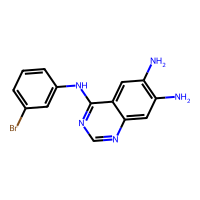

In [17]:
project1.Ligand()

All of this information and some other properties are also stored separately as instance attributes.

For example, the ligand's identifiers:

In [18]:
project1.Ligand.iupac_name
# NBVAL_CHECK_OUTPUT

'4-N-(3-bromophenyl)quinazoline-4,6,7-triamine'

In [19]:
project1.Ligand.cid
# NBVAL_CHECK_OUTPUT

'2426'

Or some of its physiochemical properties:

In [20]:
project1.Ligand.mol_weight
# NBVAL_CHECK_OUTPUT

330.189

<details>

<summary> Click here for additional information and details of other useful functions.</summary> 

We have also implemented some methods for the **Ligand** class. For example, the ***remove_counterion*** method can be used to remove the counter-ion of salt compounds from the main molecule in the SMILES. Calling this method will simply return the modified SMILES. In the case of our ligand, which is not charged and does not have a counter-ion, the original SMILES is returned: 
```python
project1.Ligand.remove_counterion()
```
This is necessary for the docking process as *Smina* can have problems processing PDBQT files of salt compounds. 
    
</details>

<a id='Binding-site-detection'></a>

### [Binding site detection](#Contents-in-Practical)

Now that the processing of all input data is completed, we can begin the binding site detection process for our protein. This is carried out by the `BindingSiteDetection` class of the pipeline, which automatically runs all the required processes based on the specifications in the input data, and stores the results (e.g. coordinates of the most suitable binding site) as instance attributes in the instantiated object. 

In the input CSV file, you'll notice that the user has the option to select between three definition methods for the binding site:

1. `coordinates`: The user must specify the **coordinates of the binding site**. In this case, there is no need for binding site detection. 
2. `ligand`: The user should specify the **ID of a co-crystallized ligand** in the protein structure. This will then be used here to define the binding site. 
3. `detection`: The user should specify a **detection method**. 

For this talktorial, we use the *DoGSiteScorer* functionality of the [*ProteinsPlus*](https://proteins.plus) webserver as our detection method. The functions required for communication with the *DoGSiteScorer* webserver's [API](https://proteins.plus/help/dogsite_rest) are implemented in the `dogsitescorer` helper module.

We can now instantiate the `BindingSiteDetection` class using 

* the `Protein` object, 
* the `Specs.BindingSite` object, 
* and the binding site output path of our project:

In [21]:
from utils import BindingSiteDetection

project1.BindingSiteDetection = BindingSiteDetection(
    protein_obj=project1.Protein,
    binding_site_specs_obj=project1.Specs.BindingSite,
    binding_site_output_path=project1.Specs.OutputPaths.binding_site_detection,
)

All intermediate information leading to the selected binding pocket's coordinates are now stored in the `BindingSiteDetection` instance of our project.

For example, a dataframe containing all retrieved information on all detected binding sites:

In [22]:
project1.BindingSiteDetection.dogsitescorer_binding_sites_df.head()

lig_cov  poc_cov    lig_name   volume  enclosure  surface  depth  \
name                                                                      
P_0      85.48    31.22  W32_A_1101  1422.66       0.10  1673.75  19.26   
P_0_0    85.48    73.90  W32_A_1101   599.23       0.06   540.06  17.51   
P_0_1     3.23     0.44  W32_A_1101   201.73       0.08   381.07  11.36   
P_0_2     0.00     0.00  W32_A_1101   185.60       0.17   282.00   9.35   
P_0_3     6.45     0.29  W32_A_1101   175.30       0.15   297.42   9.29   

       surf/vol lid/hull ellVol  ...  PRO  SER  THR  TRP  TYR  VAL  \
name                             ...                                 
P_0    1.176493        -      -  ...    3    1    2    1    1    5   
P_0_0  0.901257        -      -  ...    1    0    2    0    0    2   
P_0_1  1.889010        -      -  ...    0    0    1    0    0    1   
P_0_2  1.519397        -      -  ...    0    0    0    0    0    2   
P_0_3  1.696634        -      -  ...    1    1    0    0    0    1   

       simpleScore  drugScore  \
name                            
P_0           0.63   0.810023   
P_0_0         0.59   0.620201   
P_0_1         0.17   0.174816   
P_0_2         0.13   0.195695   
P_0_3         0.13   0.168845   

                                            pdb_file_url  \
name                                                       
P_0    https://proteins.plus/results/dogsite/twNQ4AjQ...   
P_0_0  https://proteins.plus/results/dogsite/twNQ4AjQ...   
P_0_1  https://proteins.plus/results/dogsite/twNQ4AjQ...   
P_0_2  https://proteins.plus/results/dogsite/twNQ4AjQ...   
P_0_3  https://proteins.plus/results/dogsite/twNQ4AjQ...   

                                           ccp4_file_url  
name                                                      
P_0    https://proteins.plus/results/dogsite/twNQ4AjQ...  
P_0_0  https://proteins.plus/results/dogsite/twNQ4AjQ...  
P_0_1  https://proteins.plus/results/dogsite/twNQ4AjQ...  
P_0_2  https://proteins.plus/results/dogsite/twNQ4AjQ...  
P_0_3  https://proteins.plus/results/dogsite/twNQ4AjQ...  

[5 rows x 51 columns]

The name of the selected binding site:

In [23]:
project1.BindingSiteDetection.best_binding_site_name
# NBVAL_CHECK_OUTPUT

'P_0_0'

We can also visualize the selected binding pocket (or any other pocket by providing its name; e.g. `project1.BindingSiteDetection.visualize("P_0")`):

In [24]:
project1.BindingSiteDetection.visualize_best()

NGLWidget()

Most importantly, the coordinates of the selected binding site are also assigned to the `Protein` object in the project:

In [25]:
project1.Protein.binding_site_coordinates
# NBVAL_CHECK_OUTPUT

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}

<a id='Ligand-similarity-search'></a>

### [Ligand similarity search](#Contents-in-Practical)

With the coordinates of the protein's binding site in hand, we now focus on the ligand similarity search part of the pipeline. This is implemented in the `LigandSimilaritySearch` class, which takes in the `Ligand` and `Specs.LigandSimilaritySearch` objects of the pipeline and initializes a similarity search using the [*PubChem*](https://pubchem.ncbi.nlm.nih.gov/) webserver with the help of functions implemented in the `pubchem` helper module. 

Several drug-likeness scores are then automatically calculated for each of the analogs retrieved, with the help of `rdkit` module. Using these scores, a given number (specified in the input file) of most drug-like analogs are selected and used to create `Ligand` objects with the help of the `Ligand` class that we used earlier. These are assigned as instance attributes to `LigandSimilaritySearch` as well as the input `Ligand` object.

<details>

<summary> Click here for additional information about the drug-likeness scores </summary> 

`drug_score_total` is calculated as a weighted average of the following three drug-likeness scores, with a ratio of 3:2:1, respectively:

* `drug_score_qed`: Quantitative Estimate of Drug-likeness (QED) [calculated by *RDKit*](https://www.rdkit.org/docs/source/rdkit.Chem.QED.html) using default parameters.
* `drug_score_custom`: QED calculated by implementing functions that fit experimental data from [G. Bickerton *et al.*, *Nat. Chem* **2012**, 4(2), 90-98.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/)
* `drug_score_lipinski`: [Lipinski's rule of 5](https://doi.org/10.1016/S0169-409X(96)00423-1) (normalized, i.e. 4 = 1, 3 = 0.75, 2 = 0.5, 1 = 0.25, 0 = 0)
    
</details>

We instantiate the class and assign it to our project:

*Note*: For this project, this process will take **about 2 minutes** to complete.

*Note*: This is the first place in the pipeline where we are using frozen data (see [here](#frozen_data)).

In [26]:
from utils import LigandSimilaritySearch

project1.LigandSimilaritySearch = LigandSimilaritySearch(
    ligand_obj=project1.Ligand,
    similarity_search_specs_obj=project1.Specs.LigandSimilaritySearch,
    similarity_search_output_path=project1.Specs.OutputPaths.similarity_search,
    frozen_data_filepath=frozen_data_project1.pubchem_similarity_search,
)

Now, we can view the full list of all fetched analogs, their calculated physiochemical properties and drug-likeness scores. 

In [27]:
project1.LigandSimilaritySearch.all_analogs.shape
# NBVAL_CHECK_OUTPUT

(30, 14)

CanonicalSMILES  \
CID                                                           
84759                              C1=CC=C2C(=C1)C(=NC=N2)N   
62274                    CC1=CC2=C(C=CC=N2)C3=C1N(C(=N3)N)C   
7019                       C1=CC=C2C(=C1)C(=C3C=CC=CC3=N2)N   
62389                      C1=CC=C(C=C1)CNC2=NC=NC3=C2NC=N3   
10288191  CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...   

                                                    Mol  dice_similarity  \
CID                                                                        
84759     <rdkit.Chem.rdchem.Mol object at 0x146c2bae0>             0.46   
62274     <rdkit.Chem.rdchem.Mol object at 0x146c2b680>             0.34   
7019      <rdkit.Chem.rdchem.Mol object at 0x146c2b3e0>             0.33   
62389     <rdkit.Chem.rdchem.Mol object at 0x146c2aff0>             0.32   
10288191  <rdkit.Chem.rdchem.Mol object at 0x146c2b220>             0.30   

          mol_weight  num_H_acceptors  num_H_donors  logp   tpsa  \
CID                                                                
84759        145.165                3             1  1.21  51.80   
62274        212.256                4             1  2.01  56.73   
7019         194.237                2             1  2.97  38.91   
62389        225.255                4             2  1.96  66.49   
10288191     441.232                6             3  3.01  88.41   

          num_rot_bonds  saturation  drug_score_qed  drug_score_lipinski  \
CID                                                                        
84759                 0        0.00            0.61                  1.0   
62274                 0        0.17            0.62                  1.0   
7019                  0        0.00            0.56                  1.0   
62389                 3        0.08            0.71                  1.0   
10288191              6        0.18            0.40                  1.0   

          drug_score_custom  drug_score_total  
CID                                            
84759                  0.64              0.68  
62274                  0.70              0.71  
7019                   0.63              0.66  
62389                  0.76              0.78  
10288191               0.54              0.55
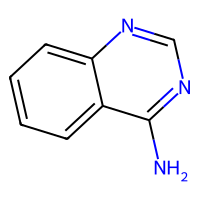
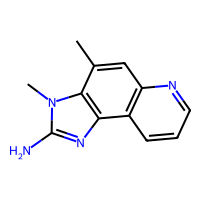
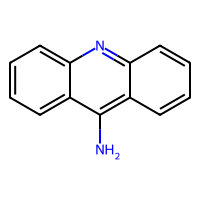
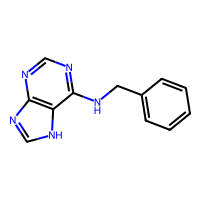
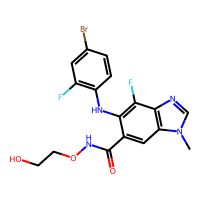

In [28]:
project1.LigandSimilaritySearch.all_analogs.head()

From these analogs, a certain number of most drug-like compounds are selected according to the input specifications.  These selected analogs are then turned into `Ligand` objects and assigned to the input `Ligand` under the attribute `analogs`: 

In [29]:
project1.Ligand.analogs
# NBVAL_CHECK_OUTPUT

{'65997': <Ligand CID: 65997>,
 '2435': <Ligand CID: 2435>,
 '57469': <Ligand CID: 57469>,
 '5011': <Ligand CID: 5011>,
 '62389': <Ligand CID: 62389>,
 '11292933': <Ligand CID: 11292933>,
 '214347': <Ligand CID: 214347>,
 '1530': <Ligand CID: 1530>,
 '11256587': <Ligand CID: 11256587>,
 '1935': <Ligand CID: 1935>,
 '62274': <Ligand CID: 62274>,
 '53462': <Ligand CID: 53462>,
 '84759': <Ligand CID: 84759>,
 '62275': <Ligand CID: 62275>,
 '6451164': <Ligand CID: 6451164>,
 '103148': <Ligand CID: 103148>,
 '7019': <Ligand CID: 7019>,
 '62805': <Ligand CID: 62805>,
 '675': <Ligand CID: 675>,
 '5546': <Ligand CID: 5546>}

The above dictionary contains `Ligand` objects corresponding to the selected analogs. Just like our input `Ligand`, each analog has thus its own attributes and methods, which can be accessed separately via the analog's CID. For example:

In [30]:
project1.Ligand.analogs["65997"]
# NBVAL_CHECK_OUTPUT

<Ligand CID: 65997>

Value
Property                                                              
                         <rdkit.Chem.rdchem.Mol object at 0x146c2bed0>
name                                                        Lerisetron
iupac_name                      1-benzyl-2-piperazin-1-ylbenzimidazole
smiles                         C1CN(CCN1)C2=NC3=CC=CC=C3N2CC4=CC=CC=C4
cid                                                              65997
inchi                InChI=1S/C18H20N4/c1-2-6-15(7-3-1)14-22-17-9-5...
inchikey                                   PWWDCRQZITYKDV-UHFFFAOYSA-N
mol_weight                                                     292.386
num_H_acceptors                                                      4
num_H_donors                                                         1
logp                                                              2.49
tpsa                                                             33.09
num_rot_bonds                                                        3
saturation                                                        0.28
drug_score_qed                                                     0.8
drug_score_lipinski                                                1.0
drug_score_custom                                                 0.81
drug_score_total                                                  0.84
similarity                                                        0.19
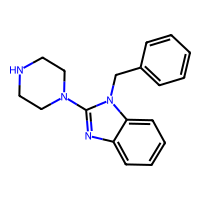

In [31]:
project1.Ligand.analogs["65997"]()

<a id='Docking-calculations'></a>

### [Docking calculations](#Contents-in-Practical)

We now have successfully 

* defined the binding site of our input protein 
* and found a set of most drug-like analogs for our input ligand. 

The next step in the pipeline is to perform docking calculations on the protein binding site using the ligand analogs. This is done automatically by the `Docking` class of the pipeline, which:
 
* prepares the structures for docking using the [*Pybel*](http://openbabel.org/docs/UseTheLibrary/Python_Pybel.html) module of the [*OpenBabel*](https://github.com/openbabel/openbabel/tree/master/scripts/python) package (implemented in the `obabel` helper module), 
* docks all provided analogs onto the protein using the [*Smina*](https://sourceforge.net/projects/smina/) program (implemented in the [`smina`](#smina_demo) helper module), 
* and processes the results and stores them separately for each docking pose. 

Other meaningful information are also extracted from the results of all docking poses for each analog and stored separately as new attributes for that analog's `Ligand` object.

We instantiate the `Docking` class with: 

* the `Protein` object containing the binding site coordinates, 
* the list of analogs (as `Ligand` objects)
* and the `Specs.Docking` object of the project. 

*Note*: This is the most computationally intense process of the pipeline and will take **5 to 10 minutes** (for 20 ligands) to complete.

*Note*: This is the second place in the pipeline where we are using frozen data (see [here](#frozen_data)).

In [32]:
from utils import Docking

project1.Docking = Docking(
    protein_obj=project1.Protein,
    list_ligand_obj=list(project1.Ligand.analogs.values()),
    docking_specs_obj=project1.Specs.Docking,
    docking_output_path=project1.Specs.OutputPaths.docking,
    frozen_data_filepath=frozen_data_project1.docking_pdbqt_files,
)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is =)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is =)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is =)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is =)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is =)



We can now view all the calculated docking results for each docking pose of each analog: 

In [33]:
project1.Docking.results_dataframe.shape
# NBVAL_CHECK_OUTPUT

(100, 4)

In [34]:
project1.Docking.results_dataframe.sort_values(by="affinity[kcal/mol]").head()

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID      mode                                                     
11292933 3                  -10.2                         1.764   
         2                  -10.2                         1.268   
         1                  -10.2                         0.000   
         4                   -9.8                         3.069   
         5                   -9.6                         3.406   

               dist from best mode_rmsd_u.b  drug_score_total  
CID      mode                                                  
11292933 3                            1.884              0.77  
         2                            2.806              0.77  
         1                            0.000              0.77  
         4                           10.342              0.77  
         5                            8.057              0.77

From the docking output we obtain ```affinity```, which is the estimated binding affinity from the docking score, along with pose distances from the best predicted binding mode, calculated using different methods (```best mode_rmsd_l.b``` and ```best mode_rmsd_u.b```).

<details>

<summary> Click here for additional information about the Smina output.</summary> 

From the [*Autodock Vina* manual](http://vina.scripps.edu/manual/):

RMSD values are calculated relative to the best mode and use only movable heavy atoms. Two variants of RMSD metrics are provided, rmsd/lb (RMSD lower bound) and rmsd/ub (RMSD upper bound), differing in how the atoms are matched in the distance calculation:

* $rmsd/ub$ (upper bound) matches each atom in one conformation with itself in the other conformation, ignoring any symmetry
* $rmsd/lb$ (lower bound) is defined as follows: $rmsd/lb(c1, c2) = max(rmsd'(c1, c2), rmsd'(c2, c1))$, i.e. a match between each atom in one conformation with the *closest* atom of the same element type in the other conformation.
    
</details>

In [35]:
best_affinity_pose = project1.Docking.results_dataframe.sort_values(by="affinity[kcal/mol]").index[
    0
]
value = project1.Docking.results_dataframe.loc[best_affinity_pose]["affinity[kcal/mol]"]
print(
    f"Predicted best ranking molecule (CID): {best_affinity_pose[0]}, predicted affinity value below [kcal/mol]: {value}."
)
# NBVAL_CHECK_OUTPUT

Predicted best ranking molecule (CID): 11292933, predicted affinity value below [kcal/mol]: -10.2.


Alternatively, by accessing a specific analog, we can view the full results for that analog using the attribute `dataframe_docking`:

In [36]:
project1.Ligand.analogs["11292933"].dataframe_docking

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
mode                                                     
1                  -10.2                         0.000   
2                  -10.2                         1.268   
3                  -10.2                         1.764   
4                   -9.8                         3.069   
5                   -9.6                         3.406   

      dist from best mode_rmsd_u.b  
mode                                
1                            0.000  
2                            2.806  
3                            1.884  
4                           10.342  
5                            8.057

A summary of the docking results (e.g. highest/mean binding affinities) are also added to the main dataframe of each analog and can be viewed by calling its object. Here showing only the relevant data, i.e. the last 7 rows:     

In [37]:
project1.Ligand.analogs["11292933"]().tail(7)

Value
Property                                 
binding_affinity_best               -10.2
binding_affinity_mean               -10.0
binding_affinity_std             0.282843
docking_poses_dist_rmsd_lb_mean    1.9014
docking_poses_dist_rmsd_lb_std   1.384062
docking_poses_dist_rmsd_ub_mean    4.6178
docking_poses_dist_rmsd_ub_std   4.378211

The same summary data are also added as instance attributes for each object, e.g.:
    

In [38]:
project1.Ligand.analogs["11292933"].binding_affinity_best

-10.2

#### Visualizing the docking poses

The `nglview` helper module provides additional methods to the `Docking` class for visualization of the docking poses. For example, we can view all poses together in an interactive way using the `visualize_all_poses` method. In this method, poses are sorted by their binding affinities and labeled by their CID and corresponding pose number. By selecting an analog from the menu below, the viewer automatically shows the protein residues in close proximity (i.e. 6 Å) of the ligand, as well as its corresponding binding affinity.

Also if we are interested in visualization of a certain analog's docking poses, we can use the `visualize_analog_poses` method instead, and provide the analog's CID.

**Note: Clicking through different ligands and docking poses works only when you execute this talktorial; it does not work on the website version of the talktorial.**

In [39]:
project1.Docking.visualize_all_poses()

Docking modes
(CID - mode)


AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

Now let's separately dock the input ligand in order to be able to compare the results later and see how the analogs compare to the starting ligand.
    

In [40]:
project1.Ligand.Docking = Docking(
    protein_obj=project1.Protein,
    list_ligand_obj=[project1.Ligand],
    docking_specs_obj=project1.Specs.Docking,
    docking_output_path=project1.Specs.OutputPaths.ligand,
    frozen_data_filepath=frozen_data_project1.docking_pdbqt_files,
)

Similar to the analogs, the docking results of the input ligand is also stored in its object. 

For example, to see the docking dataframe:
   

In [41]:
project1.Ligand.dataframe_docking

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
mode                                                     
1                   -8.7                         0.000   
2                   -8.7                         1.839   
3                   -8.7                         3.811   
4                   -8.7                         3.340   
5                   -8.4                         2.002   

      dist from best mode_rmsd_u.b  
mode                                
1                            0.000  
2                            2.339  
3                            5.375  
4                            4.918  
5                            3.534

In [42]:
value = project1.Ligand.dataframe_docking.loc[1]["affinity[kcal/mol]"]
print(f"Predicted affinity value for pose 1 of input ligand [kcal/mol]: {value}")
# NBVAL_CHECK_OUTPUT

Predicted affinity value for pose 1 of input ligand [kcal/mol]: -8.7


Comparing these results, we can already see that the pipeline has found an analog with an estimated binding affinity that is 17% higher than that of the input ligand (-10.2 kcal/mol versus -8.7 kcal/mol). 

<a id='Analysis-of-protein&mdash;ligand-interactions'></a>

### [Analysis of protein&mdash;ligand interactions](#Contents-in-Practical)

With the docking poses of each analog in hand, we can now focus on analyzing the protein-ligand interactions in each docking pose of each analog. For the analysis, we use the functionalities of the [*PLIP*](https://github.com/pharmai/plip) package, for which we have implemented the helper module `plip`. This is then used in the `InteractionAnalysis` class of the pipeline, which automatically calculates all interaction information for each docked pose of each ligand. 

The `InteractionAnalysis` class can be instantiated by providing 

* the PDBQT and PDB filepaths of the separated protein structure, 
* the first residue number in the protein,
* a list of all analogs (as `Ligand` objects), 
* the results dataframe of the docking process,
* the `Specs.InteractionAnalysis` object of the project,
* and the output path for storing the interaction analysis data.

In [43]:
from utils import InteractionAnalysis

project1.InteractionAnalysis = InteractionAnalysis(
    separated_protein_pdbqt_filepath=project1.Docking.pdbqt_filepath_extracted_protein,
    separated_protein_pdb_filepath=project1.Docking.pdb_filepath_extracted_protein,
    protein_first_residue_number=project1.Protein.residue_number_first,
    list_ligand_obj=list(project1.Ligand.analogs.values()),
    docking_master_df=project1.Docking.master_df,
    interaction_analysis_specs_obj=project1.Specs.InteractionAnalysis,
    interaction_analysis_output_path=project1.Specs.OutputPaths.interaction_analysis,
)

The interactions can now be inspected collectively for all docking poses of all analogs. Here, only the number of interactions are recorded for each interaction type:

In [44]:
project1.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
).head()

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID      mode                                                     
11256587 5                   -7.6                         1.995   
11292933 4                   -9.8                         3.069   
62805    2                   -7.3                         2.664   
11292933 2                  -10.2                         1.268   
11256587 3                   -7.9                         1.331   

               dist from best mode_rmsd_u.b  drug_score_total  \
CID      mode                                                   
11256587 5                            5.515              0.75   
11292933 4                           10.342              0.77   
62805    2                            5.385              0.65   
11292933 2                            2.806              0.77   
11256587 3                            1.964              0.75   

               total_num_interactions  h_bond  hydrophobic  salt_bridge  \
CID      mode                                                             
11256587 5                         13       2           10            1   
11292933 4                         13       1           12            0   
62805    2                         12       4            8            0   
11292933 2                         11       3            7            1   
11256587 3                         11       5            5            1   

               water_bridge  pi_stacking  pi_cation  halogen  metal  
CID      mode                                                        
11256587 5                0            0          0        0      0  
11292933 4                0            0          0        0      0  
62805    2                0            0          0        0      0  
11292933 2                0            0          0        0      0  
11256587 3                0            0          0        0      0

In [45]:
min_affinity = -10.0
min_total_num_interactions = 11

best_interaction_and_score_df = project1.InteractionAnalysis.results[
    project1.InteractionAnalysis.results["affinity[kcal/mol]"] < min_affinity
]
best_interaction_and_score_df = best_interaction_and_score_df[
    best_interaction_and_score_df["total_num_interactions"] >= min_total_num_interactions
]
best_pose = best_interaction_and_score_df.index[0]
value = best_interaction_and_score_df.loc[best_pose]["total_num_interactions"]
print(
    f"Molecule CID: {best_pose[0]} has "
    f"highest number of interactions (>= {min_total_num_interactions}): "
    f"{value}"
)
# NBVAL_CHECK_OUTPUT

Molecule CID: 11292933 has highest number of interactions (>= 11): 11.0


If we are interested in the details of a specific interaction type for a specific docking pose, we can access this information from the corresponding `Ligand` object of the analog. 
    
For example, accessing the data for hydrophobic interactions of the first docking pose for analog 65997 (showing only the 5 first entries):   

In [46]:
project1.Ligand.analogs["11292933"].docking_pose_1_interactions_hydrophobic.head()

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  DIST  \
0    718     LEU        A          1         UNL            A  3.79   
1    745     LYS        A          1         UNL            A  3.86   
2    777     LEU        A          1         UNL            A  4.00   
3    788     LEU        A          1         UNL            A  3.89   
4    997     PHE        A          1         UNL            A  3.62   

   LIGCARBONIDX  PROTCARBONIDX                    LIGCOO  \
0          2561            786   (17.897, 36.44, 17.368)   
1          2566            860    (16.92, 32.588, 9.596)   
2          2569            964   (15.747, 32.274, 7.079)   
3          2569            990   (15.747, 32.274, 7.079)   
4          2562           2028  (18.343, 36.986, 18.567)   

                    PROTCOO  
0   (17.938, 39.85, 15.721)  
1   (20.007, 34.389, 8.138)  
2   (13.269, 31.938, 3.962)  
3   (15.887, 34.523, 3.909)  
4  (15.445, 36.979, 20.742)

Or hydrogen-bond interactions of the second docking pose for analog 11292933:    

In [47]:
project1.Ligand.analogs["11292933"].docking_pose_2_interactions_h_bond.head()

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  SIDECHAIN  \
0    855     ASP        A          1         UNL            A      False   
1    856     PHE        A          1         UNL            A      False   
2    842     ASN        A          1         UNL            A       True   

  DIST_H-A DIST_D-A DON_ANGLE  PROTISDON  DONORIDX DONORTYPE  ACCEPTORIDX  \
0     3.40     3.87    111.41       True        29       Nam         2575   
1     2.11     2.94    137.18      False      2575       Nam           20   
2     2.38     3.36    157.98      False      2549        N3         1208   

  ACCEPTORTYPE                    LIGCOO                   PROTCOO  
0          Nam   (17.315, 28.321, 5.716)   (17.692, 27.727, 9.517)  
1           O2   (17.315, 28.321, 5.716)   (18.707, 25.862, 4.918)  
2           O2  (19.188, 32.093, 12.476)  (20.864, 29.305, 13.306)

Again, a summary of interaction analysis data is also added to each analog's main dataframe, which can be viewed by calling its `Ligand` object. Here showing only the relevant data, i.e. the last 9 rows:
    

In [48]:
project1.Ligand.analogs["11292933"]().tail(9)

Value
Property                            
average_num_total_interactions  10.4
average_num_h_bond               2.0
average_num_hydrophobic          8.0
average_num_salt_bridge          0.4
average_num_water_bridge         0.0
average_num_pi_stacking          0.0
average_num_pi_cation            0.0
average_num_halogen              0.0
average_num_metal                0.0

By using the method `plot_interaction_affinity_correlation` we can also see whether there is any visible correlation between the calculated binding affinities and the number of interactions for each docking pose:

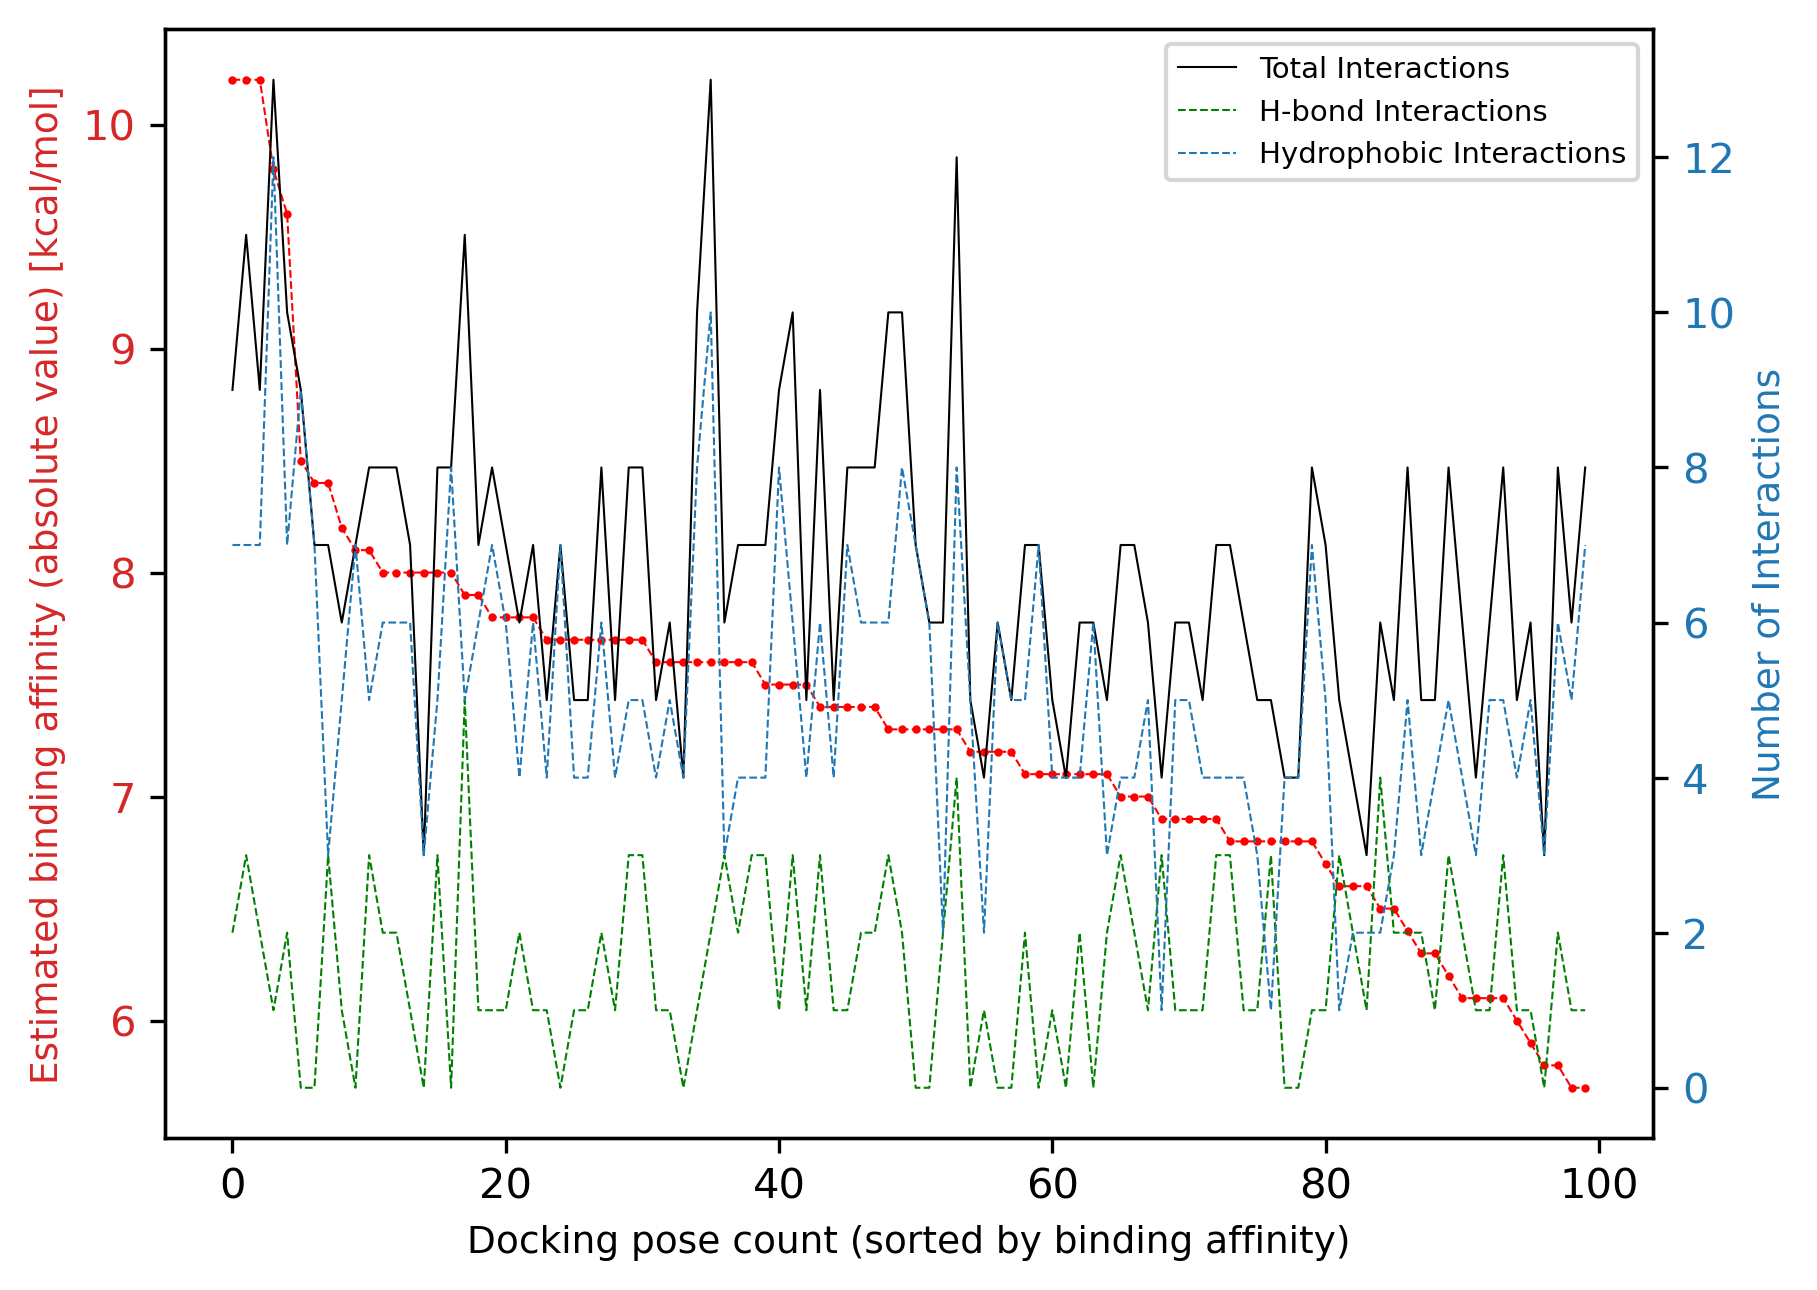

In [49]:
project1.InteractionAnalysis.plot_interaction_affinity_correlation()

We see that no obvious correlation is visible between the two sets of data; the number of total interactions is weakly correlated with the binding affinity, albeit with several outliers.

Now let's also analyze the interactions in the docking poses of the input ligand for comparison:    

In [50]:
project1.Ligand.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    [project1.Ligand],
    project1.Ligand.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.ligand,
)

The results can be viewed in a similar way to the analogs. For example, to view the summary data:    

In [51]:
project1.Ligand.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
)

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID  mode                                                     
2426 5                   -8.4                         2.002   
     1                   -8.7                         0.000   
     3                   -8.7                         3.811   
     4                   -8.7                         3.340   
     2                   -8.7                         1.839   

           dist from best mode_rmsd_u.b  drug_score_total  \
CID  mode                                                   
2426 5                            3.534               0.7   
     1                            0.000               0.7   
     3                            5.375               0.7   
     4                            4.918               0.7   
     2                            2.339               0.7   

           total_num_interactions  h_bond  hydrophobic  salt_bridge  \
CID  mode                                                             
2426 5                         10       3            7            0   
     1                          8       2            6            0   
     3                          8       5            3            0   
     4                          8       5            3            0   
     2                          6       2            4            0   

           water_bridge  pi_stacking  pi_cation  halogen  metal  
CID  mode                                                        
2426 5                0            0          0        0      0  
     1                0            0          0        0      0  
     3                0            0          0        0      0  
     4                0            0          0        0      0  
     2                0            0          0        0      0

Again, we see that the pipeline has successfully found analogs that have docking poses with higher number of interactions (up to 12) than those of the input ligand (up to 10).

#### Visual interaction analysis

Thanks to the `nglview` helper module, we have additional methods available in the `InteractionAnalysis` class for visualization of the protein-ligand interactions. For example, we can now view the interactions for all docking poses in an interactive way. By selecting each docking pose from the menu (labeled by their CID and mode-number and sorted by their binding affinities), all the interacting residues are shown. The interactions are visualized with colored lines, for which a color-map is also provided.

Alternatively, if we are interested in visualization of a certain analog's interactions, we can use the `visualize_analog_interactions` method instead, and provide the analog's CID.


***Note*: Clicking through different ligands and docking poses works only when you execute this talktorial; it does not work on the website version of the talktorial.**

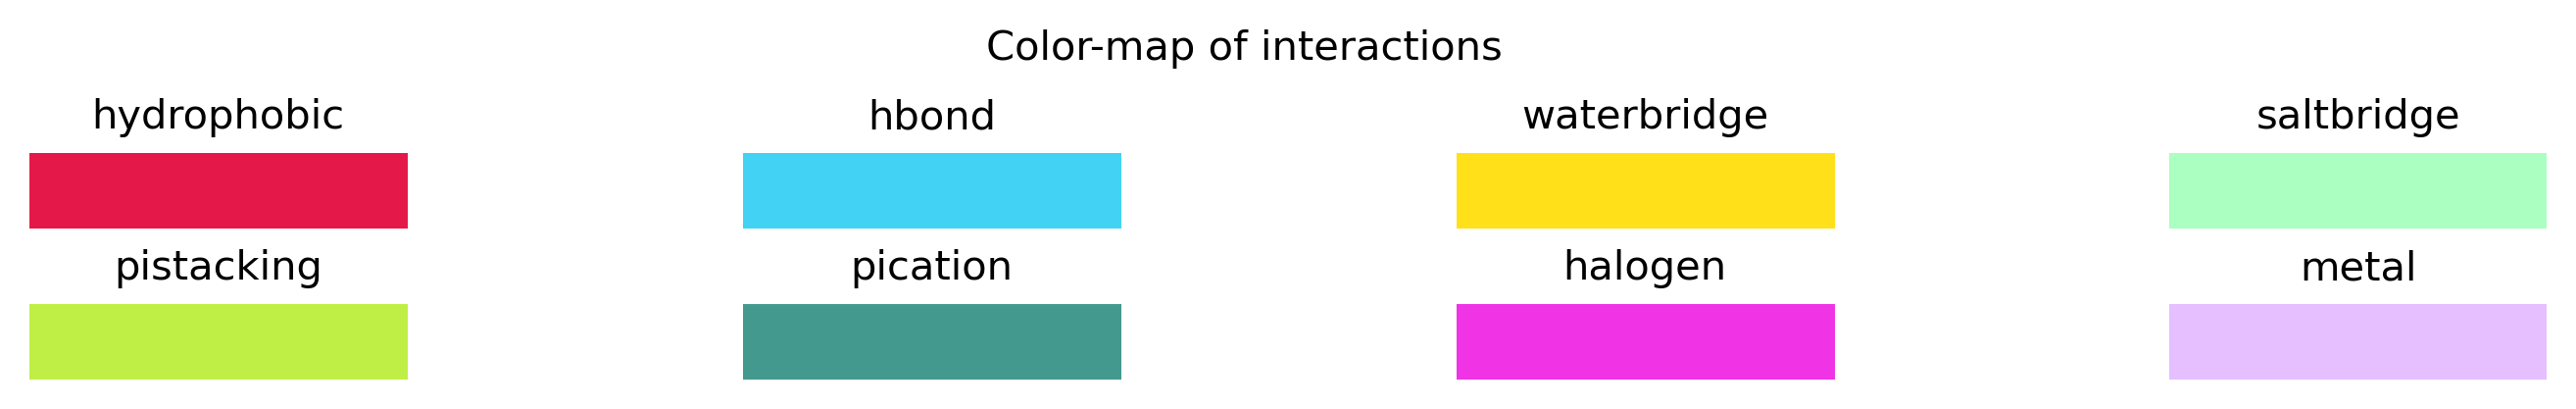

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

In [52]:
project1.InteractionAnalysis.visualize_all_interactions()

#### Finding poses with specific interactions

We can also search for docking poses displaying a specific set of interactions with specific residues of the protein, using the `find_poses_with_specific_interactions` method. This returns a list of tuples, where the first tuple element is the CID, and the second element is its corresponding docking pose number in which the specified interaction exists.

We can provide a set of desired interactions to the function, and specify whether we are looking for docking poses that exhibit all or any of these interactions.

For example, since it's a common interaction in many kinase inhibitors, we can search for the ligands that are involved in hydrogen-bonding with the hinge region of the protein (i.e. residue M793 in EGFR): 

In [53]:
analog_poses_with_desired_interactions = (
    project1.InteractionAnalysis.find_poses_with_specific_interactions(
        list_interaction_data=[["h_bond", 793]], all_or_any="any"
    )
)

analog_poses_with_desired_interactions

[('1530', 3),
 ('1935', 1),
 ('62274', 2),
 ('62274', 4),
 ('53462', 5),
 ('62275', 5),
 ('103148', 5),
 ('7019', 1),
 ('7019', 2),
 ('5546', 2)]

Using the `visualize_docking_poses_interactions` method, we can also visualize the results separately instead of looking for them in the menu of the viewer above. This method takes a list of docking poses (as tuples, where the first elements are the CIDs, and the second elements are the docking pose numbers; i.e. exactly the output format of `find_poses_with_specific_interactions`) and visualizes them:    

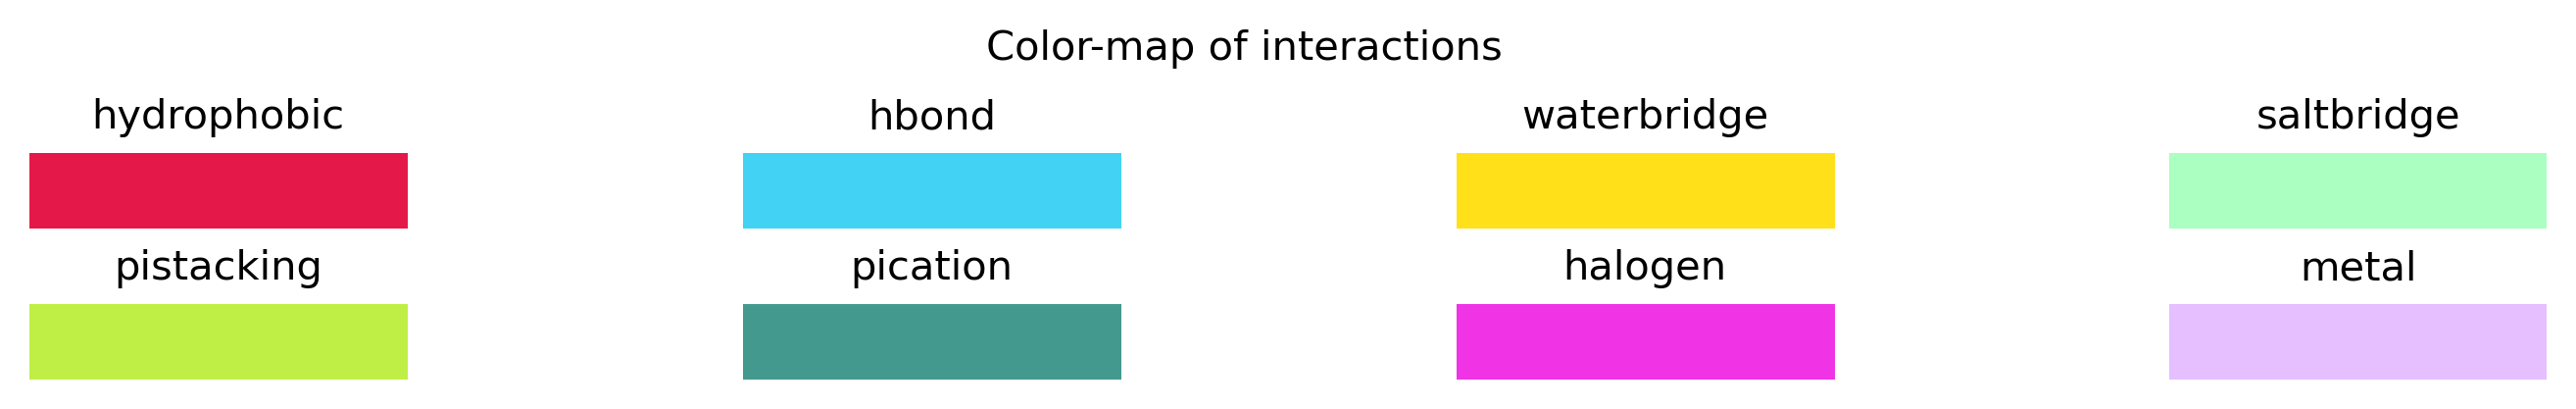

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

In [54]:
project1.InteractionAnalysis.visualize_docking_poses_interactions(
    list_of_cid_pose_nr_tuples=analog_poses_with_desired_interactions
)

<a id='Selection-of-the-best-analog'></a>

### [Selection of the best analog](#Contents-in-Practical)

At this point, we have carried out all the processes in the pipeline and have gathered all the information in our `LeadOptimizationPipeline` instance, i.e. `project1`. 

To recap, we have

* found the most suitable binding site in the input protein based on the specifications of our project,
* gathered a number of analogs to the input ligand and filtered them to choose those with the highest drug-likeness scores, and
* calculated several docking poses and corresponding binding affinities for each analog and analyzed their interactions with the protein. 

Now we import the class `OptimizedLigands`, which takes in the whole project, and based on the specifications in the input file, selects the best analog(s). 

In [55]:
from utils import OptimizedLigands

project1.OptimizedLigands = OptimizedLigands(project=project1)

The class has a `__call__` method, which prints out a summary:    

In [56]:
project1.OptimizedLigands()

<span style='color:blue'>Number of docking poses with higher binding affinity than highest binding affinity of ligand: </span><span style='color:black'>5</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>Number of docking poses with higher number of total interactions than highest interacting pose of ligand: </span><span style='color:black'>10</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933', '11256587', '62805', '57469', '5011', '1935']</span>

<span style='color:blue'>Number of docking poses with higher affinity and number of total interactions than best corresponding poses of ligand: </span><span style='color:black'>3</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>CIDs of analogs with higher binding affinity, number of total interactions and drug-likeness score than ligand: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>**CIDs of selected analogs as final output:** </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>Comparison between the input ligand and optimized analog: </span><span style='color:black'></span>

Input Ligand  Optimized Analog
Drug-Score                                     0.7              0.77
Highest Binding Affinity                      -8.7            -10.20
Highest Number of Total Interactions          10.0             13.00

We can see that the pipeline successfully found an analog superior to the input ligand in all of the three metrics, i.e. calculated drug-likeness, estimated binding affinity, and total number of protein-ligand interactions.  

Lastly we can simply visualize the most suited analog(s) found:

Value
Property                                                                          
                                     <rdkit.Chem.rdchem.Mol object at 0x146c282e0>
name                             1-(3-(2-(4-(2-Methyl-5-quinolinyl)-1-piperazin...
iupac_name                       1-[3-[2-[4-(2-methylquinolin-5-yl)piperazin-1-...
smiles                           CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=...
cid                                                                       11292933
inchi                            InChI=1S/C25H29N5O/c1-19-8-9-22-23(27-19)6-3-7...
inchikey                                               ANGUXJDGJCHGOG-UHFFFAOYSA-N
mol_weight                                                                 415.541
num_H_acceptors                                                                  4
num_H_donors                                                                     1
logp                                                                          3.44
tpsa                                                                         51.71
num_rot_bonds                                                                    5
saturation                                                                    0.36
drug_score_qed                                                                0.69
drug_score_lipinski                                                            1.0
drug_score_custom                                                             0.77
drug_score_total                                                              0.77
similarity                                                                     0.2
binding_affinity_best                                                        -10.2
binding_affinity_mean                                                        -10.0
binding_affinity_std                                                      0.282843
docking_poses_dist_rmsd_lb_mean                                             1.9014
docking_poses_dist_rmsd_lb_std                                            1.384062
docking_poses_dist_rmsd_ub_mean                                             4.6178
docking_poses_dist_rmsd_ub_std                                            4.378211
average_num_total_interactions                                                10.4
average_num_h_bond                                                             2.0
average_num_hydrophobic                                                        8.0
average_num_salt_bridge                                                        0.4
average_num_water_bridge                                                       0.0
average_num_pi_stacking                                                        0.0
average_num_pi_cation                                                          0.0
average_num_halogen                                                            0.0
average_num_metal                                                              0.0
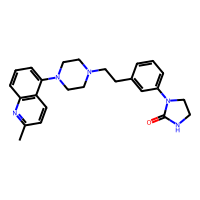

In [57]:
project1.OptimizedLigands.show_final_output()

The final output of the pipeline is thus a certain number (specified in the input specifications) of `Ligand` objects corresponding to the optimized analogs found:

In [58]:
project1.OptimizedLigands.output
# NBVAL_CHECK_OUTPUT

[<Ligand CID: 11292933>]

<a id='Putting-the-pieces-together:-A-fully-automated-pipeline'></a>

### [Putting the pieces together: A fully automated pipeline](#Contents-in-Practical)

Now that we have separately demonstrated all the different parts of our pipeline, we will introduce a method &mdash;`LeadOptimizationPipeline.run` &mdash; to automatically run the whole pipeline and display the results. It takes in the project name, the filepath of the input data, and the output path, and performs all the necessary processes to generate the final output. It will also print a summary of the intermediate results for each part of the pipeline, so that the process can be followed.

For this demonstration, let's take the optimized analog we just found and use it as the input ligand to see whether we can do better than our previous optimization results and obtain an even better analog. 

We first need to create the corresponding input file. To do so, we can simply open the input file of our project, modify the ligand input value, and save the file as a new input file:

In [59]:
new_input_df = pd.read_csv(project1.Specs.RawData.filepath)

new_input_df.head()
# NBVAL_CHECK_OUTPUT

Subject           Property                            Value  \
0       Protein        Input Type*                         pdb_code   
1       Protein       Input Value*                             3W32   
2        Ligand        Input Type*                           smiles   
3        Ligand       Input Value*  Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N   
4  Binding Site  Definition Method                        detection   

                                         Description  
0               Allowed: 'pdb_code', 'pdb_filepath'.  
1  Either a valid PDB-code or a local filepath to...  
2  Allowed: 'smiles', 'cid', 'inchi', 'inchikey',...  
3  Identifier value corresponding to given input ...  
4  Definition method for the protein binding site...

In [60]:
new_input_df.loc[3, "Value"] = project1.OptimizedLigands.output[0].smiles

new_input_df.head()
# NBVAL_CHECK_OUTPUT

Subject           Property  \
0       Protein        Input Type*   
1       Protein       Input Value*   
2        Ligand        Input Type*   
3        Ligand       Input Value*   
4  Binding Site  Definition Method   

                                               Value  \
0                                           pdb_code   
1                                               3W32   
2                                             smiles   
3  CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=...   
4                                          detection   

                                         Description  
0               Allowed: 'pdb_code', 'pdb_filepath'.  
1  Either a valid PDB-code or a local filepath to...  
2  Allowed: 'smiles', 'cid', 'inchi', 'inchikey',...  
3  Identifier value corresponding to given input ...  
4  Definition method for the protein binding site...

In [61]:
new_input_df.to_csv(DATA / "PipelineInputData_Project2.csv")

Now let's run the pipeline again, this time fully automated and with the already optimized ligand as input. Other than printing out a short summary of results in real-time, at the end the function also returns the whole project as a `LeadOptimizationPipeline` object similar to `project1`. Thus, by assigning the return value to a variable (here `project2`), we can later further investigate the information generated by the pipeline in more detail.

*Note*: We are again using frozen data for the similarity search results and generation of 3D conformations for the analogs to ensure the stability of the pipeline's results (see [here](#frozen_data)).

<span style='color:blue'>**1. Initializing Project:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Project name: **Project2_EGFR_CID11292933**</span>

<span style='color:blue'>**2. Initializing Input/Output:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Input data read from: **/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/PipelineInputData_Project2.csv**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Output folders created at: **/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Project2_EGFR_CID11292933**</span>

Sending GET request to https://files.rcsb.org/download/3W32.pdb to fetch 3W32's pdb file as a string.


<span style='color:blue'>**3. Processing Protein:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Structure Title: </span><span style='color:black'>**EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name: </span><span style='color:black'>**EPIDERMAL GROWTH FACTOR RECEPTOR**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Chains: </span><span style='color:black'>**['A']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Ligands: </span><span style='color:black'>**[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;First Residue Number: </span><span style='color:black'>**701**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Last Residue Number: </span><span style='color:black'>**1017**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of Residues: </span><span style='color:black'>**317**</span>

NGLWidget()

<span style='color:blue'>**4. Processing Ligand:** </span><span style='color:green'>Successful</span>

Value
Property                                                              
                         <rdkit.Chem.rdchem.Mol object at 0x147ad6500>
name                 1-(3-(2-(4-(2-Methyl-5-quinolinyl)-1-piperazin...
iupac_name           1-[3-[2-[4-(2-methylquinolin-5-yl)piperazin-1-...
smiles               CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=...
cid                                                           11292933
inchi                InChI=1S/C25H29N5O/c1-19-8-9-22-23(27-19)6-3-7...
inchikey                                   ANGUXJDGJCHGOG-UHFFFAOYSA-N
mol_weight                                                     415.541
num_H_acceptors                                                      4
num_H_donors                                                         1
logp                                                              3.44
tpsa                                                             51.71
num_rot_bonds                                                        5
saturation                                                        0.36
drug_score_qed                                                    0.69
drug_score_lipinski                                                1.0
drug_score_custom                                                 0.77
drug_score_total                                                  0.77
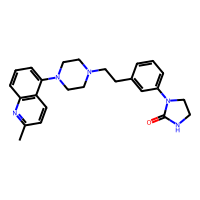

<span style='color:blue'>**5. Binding Site Detection:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site definition method: **DETECTION**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site detection method: **DOGSITESCORER**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Selection method for best binding site: **SORTING**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Selection criteria for best binding site: **['lig_cov', 'poc_cov']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name of selected binding site: **P_0_0**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - center: **[15.91, 32.33, 11.03]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - size: **[24.84, 24.84, 24.84]**</span>

<span style='color:blue'>**6. Ligand Similarity Search:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Search engine: **PUBCHEM**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of fetched analogs with a similarity higher than **70%**: **30**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Dice-similarity range of fetched analogs: **0.14 - 0.39**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest Dice-similarity: **60149**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of selected drug-like analogs: **20**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Range of drug-likeness score in selected analogs: **0.71 - 0.92**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest drug-likeness score: **5761**</span>

<span style='color:blue'>**7. Docking Experiment:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Highest binding affinity of input ligand: **-10.2**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding affinity range of analogs: **-6.3 - -10.8**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of analog docking poses with higher affinity than ligand: **2**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of analogs with higher affinity than ligand: **2**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs with higher affinity than ligand: **{'60149', '28693'}**</span>

Docking modes
(CID - mode)


AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**8. Protein-Ligand Interaction Analysis:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Highest number of total interactions in a docking pose of input ligand: **13**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Range of total number of interactions in docking poses of analogs: **4 - 13**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Correlation plot between binding affinity and number of interactions in docking poses of analogs:</span>

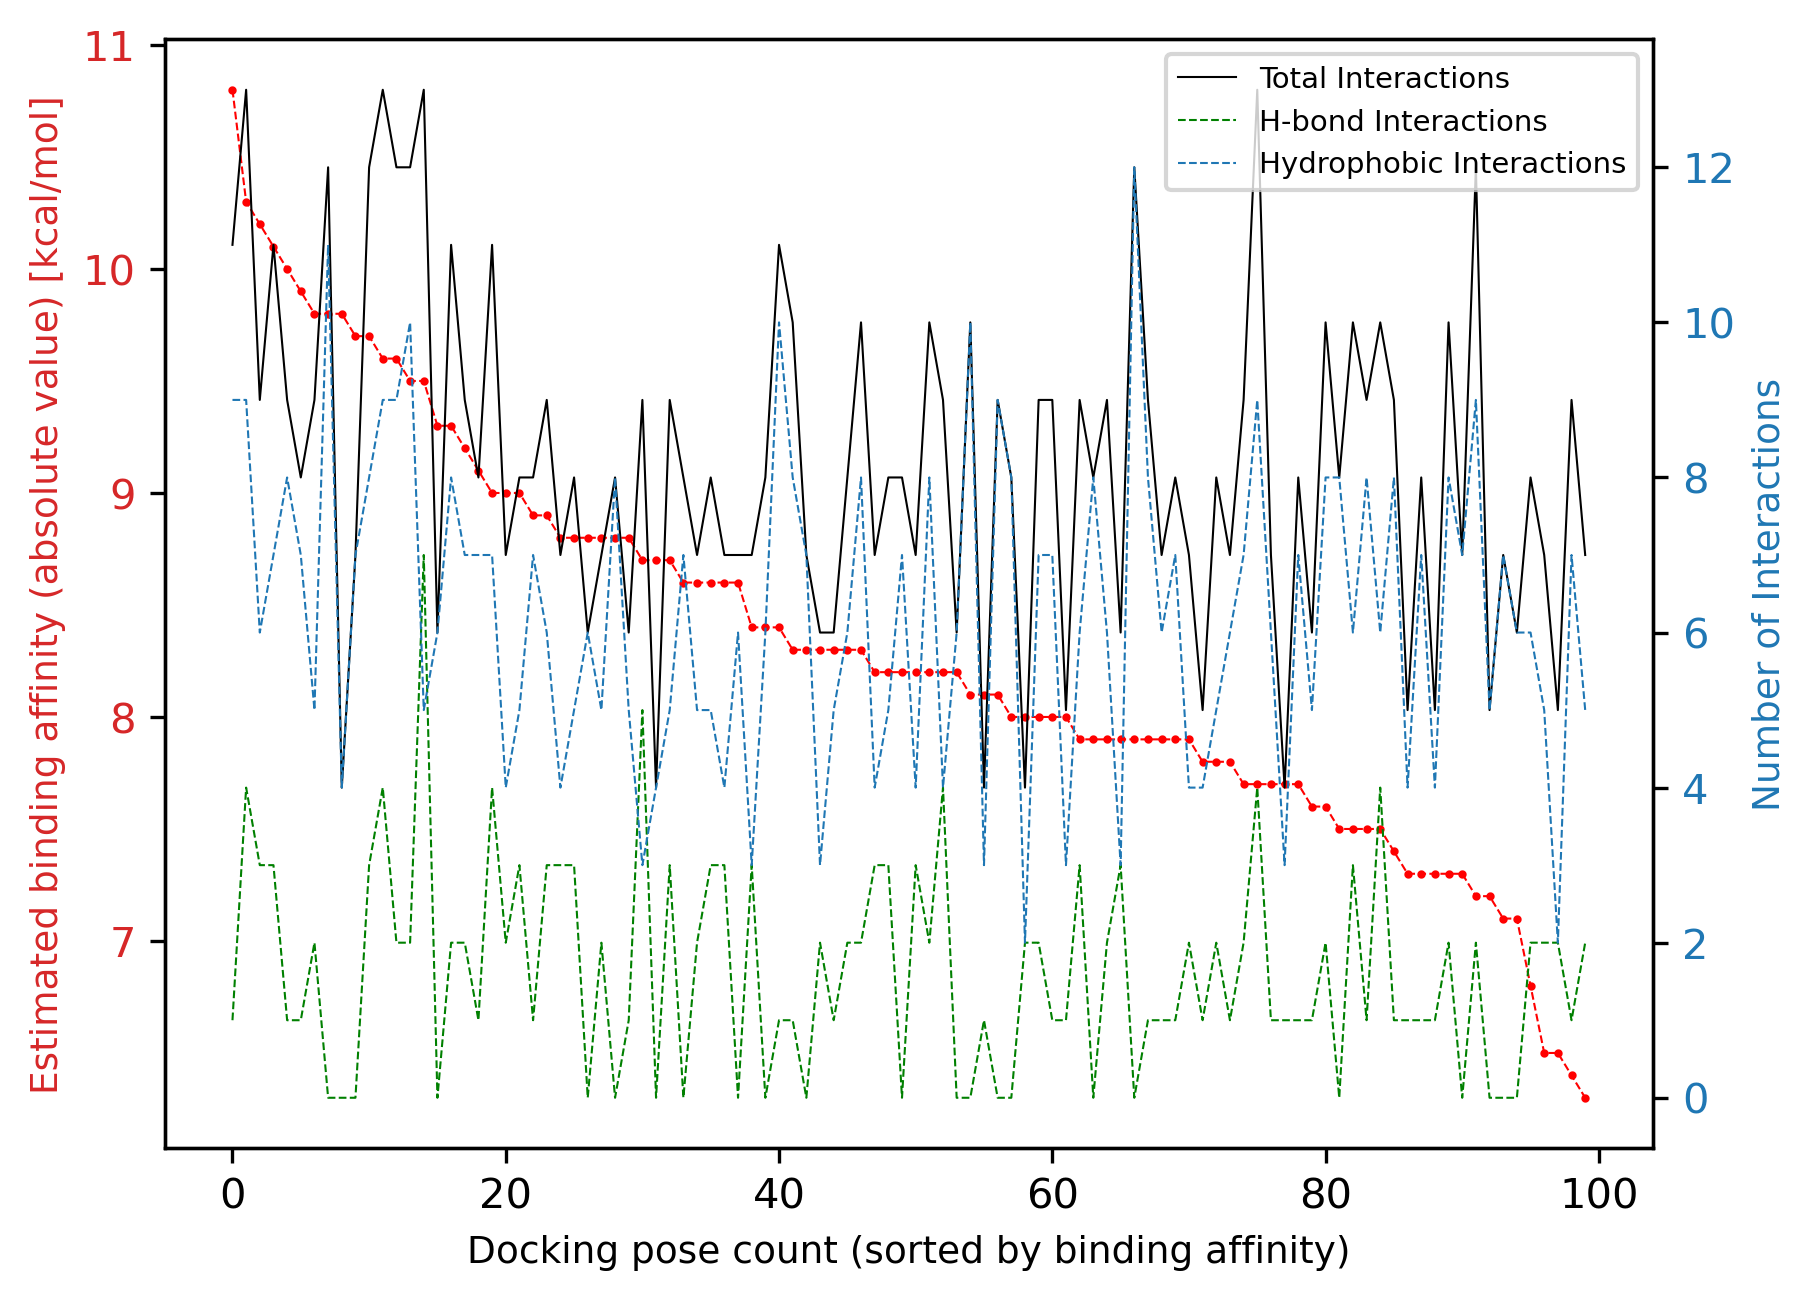

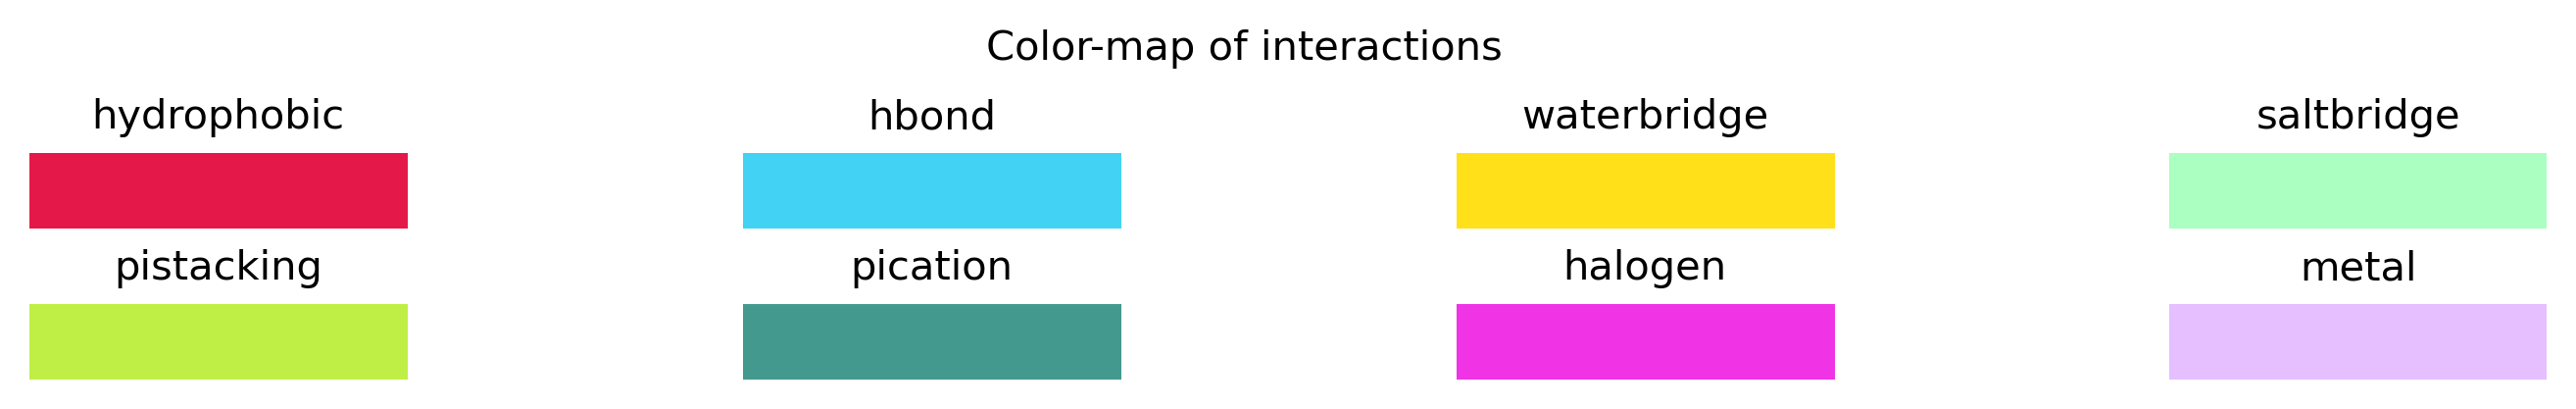

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**9. Selecting The Optimized Analog:** </span><span style='color:green'>Successful</span>

<span style='color:blue'>Number of docking poses with higher binding affinity than highest binding affinity of ligand: </span><span style='color:black'>3</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['28693', '60149']</span>

<span style='color:blue'>Number of docking poses with higher number of total interactions than highest interacting pose of ligand: </span><span style='color:black'>4</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['8226', '2719', '9931954', '60149']</span>

<span style='color:blue'>Number of docking poses with higher affinity and number of total interactions than best corresponding poses of ligand: </span><span style='color:black'>1</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['60149']</span>

<span style='color:blue'>CIDs of analogs with higher binding affinity, number of total interactions and drug-likeness score than ligand: </span><span style='color:black'>[]</span>

<span style='color:blue'>**CIDs of selected analogs as final output:** </span><span style='color:black'>['28693']</span>

<span style='color:blue'>Comparison between the input ligand and optimized analog: </span><span style='color:black'></span>

Input Ligand  Optimized Analog
Drug-Score                                    0.77              0.78
Highest Binding Affinity                    -10.20            -10.80
Highest Number of Total Interactions         13.00             12.00

<span style='color:blue'>**Selected analogs as final output:**</span>

Value
Property                                                                          
                                     <rdkit.Chem.rdchem.Mol object at 0x147ad6340>
name                                                                   Metergoline
iupac_name                       benzyl N-[[(6aR,9S,10aR)-4,7-dimethyl-6,6a,8,9...
smiles                           CN1CC(CC2C1CC3=CN(C4=CC=CC2=C34)C)CNC(=O)OCC5=...
cid                                                                          28693
inchi                            InChI=1S/C25H29N3O2/c1-27-14-18(13-26-25(29)30...
inchikey                                               WZHJKEUHNJHDLS-QTGUNEKASA-N
mol_weight                                                                 403.526
num_H_acceptors                                                                  4
num_H_donors                                                                     1
logp                                                                          4.06
tpsa                                                                          46.5
num_rot_bonds                                                                    4
saturation                                                                     0.4
drug_score_qed                                                                0.71
drug_score_lipinski                                                            1.0
drug_score_custom                                                             0.78
drug_score_total                                                              0.78
similarity                                                                    0.23
binding_affinity_best                                                        -10.8
binding_affinity_mean                                                       -10.08
binding_affinity_std                                                      0.420714
docking_poses_dist_rmsd_lb_mean                                              2.086
docking_poses_dist_rmsd_lb_std                                            1.482648
docking_poses_dist_rmsd_ub_mean                                             4.6972
docking_poses_dist_rmsd_ub_std                                            4.087722
average_num_total_interactions                                                 9.2
average_num_h_bond                                                             1.0
average_num_hydrophobic                                                        7.6
average_num_salt_bridge                                                        0.6
average_num_water_bridge                                                       0.0
average_num_pi_stacking                                                        0.0
average_num_pi_cation                                                          0.0
average_num_halogen                                                            0.0
average_num_metal                                                              0.0
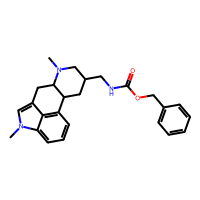

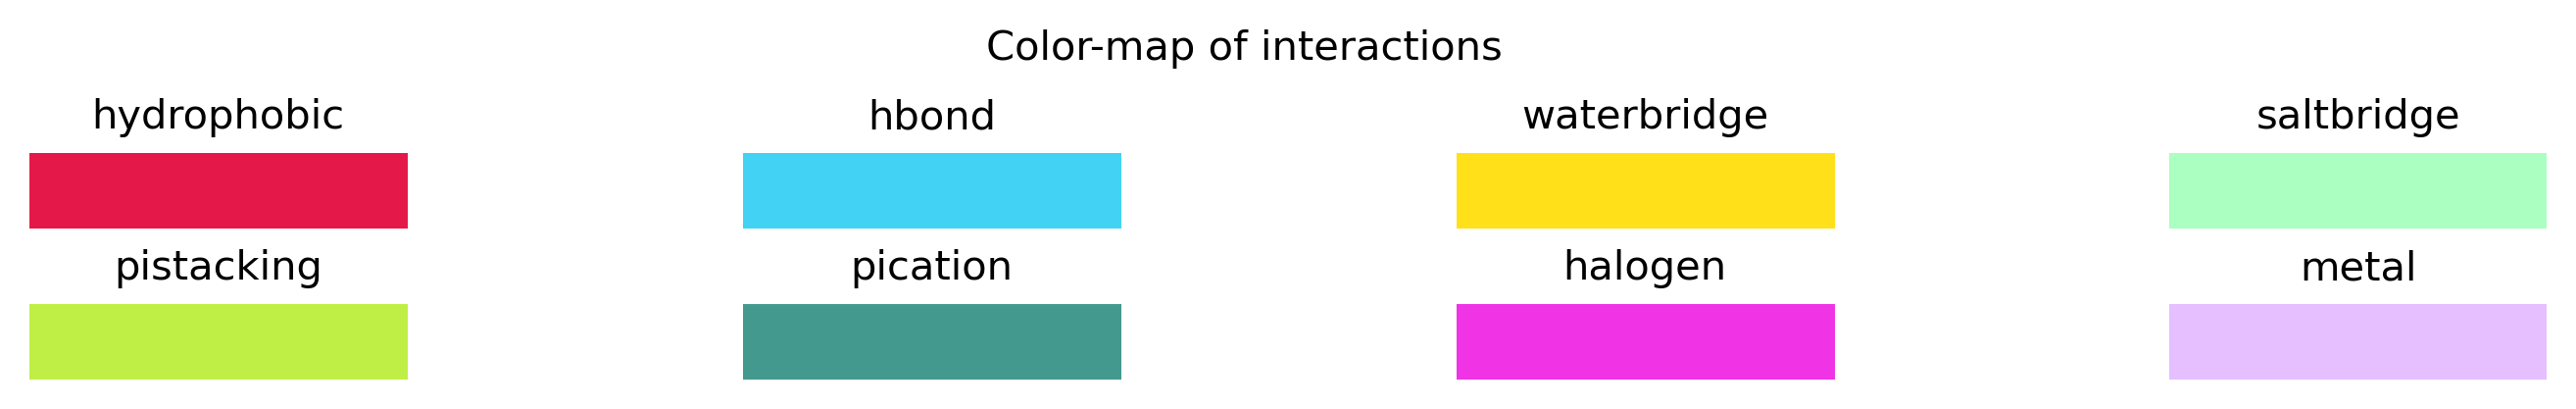

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**10. Pipeline Completed:** </span><span style='color:green'>Successful</span>

In [62]:
project2 = LeadOptimizationPipeline.run(
    project_name="Project2_EGFR_CID11292933",
    input_data_filepath=DATA / "PipelineInputData_Project2.csv",
    output_data_root_folder_path=DATA / "Outputs",
    frozen_data_filepath=frozen_data_project2.pipeline,
)

As you can see, the pipeline was again successful in finding an analog (CID: 28693) to the optimized analog of `project1` (CID: 11292933) with a higher estimated binding affinity (-10.8 kcal/mol versus -10.2 kcal/mol). The pipeline was even able to find another analog (CID: 60149) with both a higher binding affinity (but not as high as that of compound 28693) and a higher number of interactions, but since in the input specifications we have prioritized binding affinity over the number of interactions, the `OptimizedLigands` class still selected the compound 28693.

Nevertheless, we can still have a look at the analog(s) with both higher affinity and number of interactions than the input ligand (i.e. compound 60149 in this case):

In [63]:
project2.OptimizedLigands.higher_affinity_and_interacting_analogs

[<Ligand CID: 60149>]

Value
Property                                                                          
                                     <rdkit.Chem.rdchem.Mol object at 0x1471d9540>
name                                                                    Sertindole
iupac_name                       1-[2-[4-[5-chloro-1-(4-fluorophenyl)indol-3-yl...
smiles                           C1CN(CCC1C2=CN(C3=C2C=C(C=C3)Cl)C4=CC=C(C=C4)F...
cid                                                                          60149
inchi                            InChI=1S/C24H26ClFN4O/c25-18-1-6-23-21(15-18)2...
inchikey                                               GZKLJWGUPQBVJQ-UHFFFAOYSA-N
mol_weight                                                                  440.95
num_H_acceptors                                                                  3
num_H_donors                                                                     1
logp                                                                          4.63
tpsa                                                                         40.51
num_rot_bonds                                                                    5
saturation                                                                    0.38
drug_score_qed                                                                0.63
drug_score_lipinski                                                            1.0
drug_score_custom                                                             0.71
drug_score_total                                                              0.72
similarity                                                                    0.39
binding_affinity_best                                                        -10.3
binding_affinity_mean                                                        -9.74
binding_affinity_std                                                      0.531977
docking_poses_dist_rmsd_lb_mean                                             2.5082
docking_poses_dist_rmsd_lb_std                                            1.735868
docking_poses_dist_rmsd_ub_mean                                              4.157
docking_poses_dist_rmsd_ub_std                                            3.117345
average_num_total_interactions                                                 9.0
average_num_h_bond                                                             2.0
average_num_hydrophobic                                                        6.6
average_num_salt_bridge                                                        0.2
average_num_water_bridge                                                       0.0
average_num_pi_stacking                                                        0.0
average_num_pi_cation                                                          0.2
average_num_halogen                                                            0.0
average_num_metal                                                              0.0
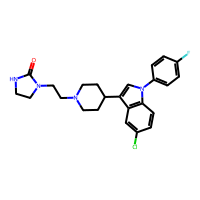

In [64]:
project2.OptimizedLigands.higher_affinity_and_interacting_analogs[0]()

Just like `project1`, the final output of the pipeline is also directly accesible as a `Ligand` object:

In [65]:
project2.OptimizedLigands.output
# NBVAL_CHECK_OUTPUT

[<Ligand CID: 28693>]

<a id='discussion'></a>

## Discussion

In this talktorial, we successfully implemented a **fully-automated virtual screening pipeline targeted at hit-expansion and lead-optimization phases of a drug discovery project**. The pipeline is designed to take in a target protein structure and a promising ligand (i.e. initial hit/lead compound), and carry out the necessary processes according to the user specifications in order to suggest an optimized analog of the input ligand, in terms of **estimated binding affinity**, **number and type of protein&mdash;ligand interactions**, and **drug-likeness**.

<details>

<summary> Click here for a more detailed summary of the pipeline's architecture and processes.</summary>

As input, the **pipeline accepts a single CSV file**, specifying a protein structure, a ligand, and various other project-specific settings for the different processes of the pipeline, e.g. criteria for the selection of the most suited binding pocket, and for finding and selecting analogs, as well as docking specifications, or desired protein&mdash;ligand interactions to look for. 

The code is compartmentalized into **eight main classes** &mdash; each of which being responsible for a specific task in the pipeline (Figure 8) &mdash; as follows:

* **`Specs`**: reads and processes the input data for further use in the pipeline, and creates output paths to store all the data generated throughout the whole process.

* **`Protein`**: uses the input protein data to create a `Protein` object that provides extended information (in form of attributes) on the protein, as well as various methods to manipulate, analyze and visualize the protein data.

* **`Ligand`**: creates a `Ligand` object from the input ligand data, with extended attributes and methods similar to the `Protein` object.

* **`BindingSiteDetection`**: provides methods to automatically perform all the necessary processes for the selection of the best protein binding site according to the input specifications. For our demonstrations in this talktorial, we used the [*DoGSiteScorer*](https://doi.org/10.1021/ci200454v) functionality of the [*ProteinsPlus*](https://doi.org/10.1093/nar/gkx333) [webserver](https://proteins.plus/) as our binding site detection method.

* **`LigandSimilaritySearch`**: contains all required functionalities to automatically execute a ligand similarity search to find suitable analogs according to the input specifications. In this talktorial, the similarity search was done using the [*PubChem* web-services](https://pubchem.ncbi.nlm.nih.gov/) via the provided [API](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access) backend. This class is also responsible for filtering the analogs based on several calculated drug-likeness scores.

* **`Docking`**: is responsible for carrying out the docking calculations and analyzing and visualizing the results. We used the [*Smina*](https://doi.org/10.1021/ci300604z) [program](https://sourceforge.net/projects/smina/) for the docking experiments, and the [`NGLview`](https://doi.org/10.1093/bioinformatics/btx789) [widget](http://nglviewer.org/nglview/latest/api.html) to visualize the docking poses.

* **`InteractionAnalysis`**: consists of methods to analyze and visualize the protein&mdash;ligand interactions in the docking poses generated by `Docking`. The analysis was done with the help of the [`PLIP`](https://github.com/pharmai/plip) package - a Python package for the [*Protein&mdash;Ligand Interaction Profiler (PLIP)*](https://doi.org/10.1093/nar/gkv315), and the interactions were visualized with the *NGLview* widget.

* **`OptimizedLigands`**: analyzes the whole data generated by the pipeline in order to select the best analogs based on criteria specified in the input settings.  


Moreover, a container class called **`LeadOptimizationPipeline`** is defined, which provides a method `run` that puts the whole pipeline together and automatically executes a given project to completion, merely by providing its input specification file. In this way, all the project's data and outputs generated by the pipeline are contained within a single object, along with all implemented functionalities, ready for further analysis or use in other programs.  

</details>

We first demonstrated the pipeline in a step-by-step fashion, using [EGFR](https://www.uniprot.org/uniprot/P00533) (PDB code: [3W32](https://www.rcsb.org/structure/3W32)) as the target protein, and a promising inhibitor with the ChEMBL compound-ID [CHEMBL328216](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL328216/) (Figure 9). After performing all the necessary processes according to the input specifications, the pipeline was able to suggest an analog of the provided ligand with optimized features in terms of estimated binding affinity (-10.2 vs. -8.7 kcal/mol), number of protein&mdash;ligand interactions (13 vs. 10) and calculated drug-likeness (77 vs 70%). 

Subsequently, we also showcased the pipeline's ability to run fully automatically. For this purpose, we tried to re-optimize the suggested analog, by keeping the same project specifications and only replacing the input ligand with the optimized analog found in the first run. This second run yielded yet another analog with an improved estimated binding affinity (-10.8 vs -10.2 kcal/mol).

![Pipeline input and output](images/pipeline_io.png)  

*Figure 9.* Results of the pipeline's performance in the demonstrated examples. Starting with a ligand with an estimated binding affinity of -8.8 kcal/mol, the pipeline was able to suggest an analog with an improved estimated affinity of -10.2 kcal/mol. Subjecting this optimized ligand to the same process resulted in another analog with an estimated binding affinity of -10.8 kcal/mol.

However, the results of the pipeline are not fully deterministic by default. This is due to the interaction of the pipeline with online databases that are being constantly updated (i.e the [*PubChem*](https://doi.org/10.1021/ci010132r) database used for ligand similarity search) and calculations that have unavoidable randomized components (i.e. generating initial conformations for docking experiments using the [*OpenBabel*](https://github.com/openbabel/openbabel/tree/master/scripts/python) package). Thus, to maintain the stability of this talktorial's results, we have circumvented this issue by freezing the outputs of the mentioned processes. Of course, this can be easily undone by modifying a single variable, so that you can easily use the pipeline for your own project.

The pipeline's code is specifically structured in such a way that it will be easy to digest, maintain and expand. For each functionality of the pipeline, a separate class was created using several helper modules that can be easily adopted and built upon for various situations and needs. As the pipeline also provides other options outside the scope of this talktorial, we have provided a [*Supplementary Information*](#Supplementary-information) section that demonstrates the use of these helper modules and showcases the possibilities of the pipeline in more detail.

<a id='quiz'></a>

## Quiz

**Conceptual Questions:**

1. Describe the processes involved in the hit-to-lead and lead optimization phases of a drug design pipeline. How are these processes implemented in the virtual pipeline described in this talktorial?
2. Describe the important facets of binding site definition in a general virtual screening pipeline. What options are available for binding site definition and selection in this pipeline? 
3. How can we use the pipeline to find analogs with a higher selectivity for the target protein?
4. Which parts of the pipeline are not fully deterministic and why? How have we circumvented this in the talktorial?

**Practical Tasks:**

1. In order to prevent the talktorial from being too lengthy, we only demonstrated a subset of the possibilities and information that the pipeline offers. Execute the pipeline by creating another `LeadOptimizationPipeline` instance (ideally with a different protein and ligand), and explore its other options by looking up the attributes and methods that the main classes of the pipeline have to offer.   

2. Generate your own input CSV files, each time choosing a different set of specifications, and compare the results. Can you find a set of specifications that perform considerably better than the others?

3. Try to implement a loop, where the final output of a pipeline is re-entered as the input for a new pipeline (i.e. try to optimize your initial input ligand through several runs, same as we did for the demonstration of the `LeadOptimizationPipeline.run` method). After how many cycles does the pipeline reach a plateau where results no longer improve?

<a id='Supplementary-information'></a>

## Supplementary information
 
Here we will demonstrate the functions of each helper module used in the pipeline, to provide a better understanding of the inner workings of the code. These modules supply the fundamental functionalities that the main classes of the pipeline rely on, and can be easily adopted for use in other bioinformatics programs. 

***Note*: Some cells use variables defined in an early cell. Therefore, in order for all cells to work properly, you have to run them sequentially.**

<a id='io_demo'></a>

### Demonstration of the `io` helper module

This module is mainly used in the class `Specs` of the pipeline, and contains the basic functions required for handling the input and output data, e.g. creating a pandas dataframe from the input CSV file, extracting specific information from the dataframe, or creating folders for storing the output data.

In [66]:
from utils import Consts
from utils.helpers import io

The input CSV file can be easily imported as a `Pandas DataFrame` via the `create_dataframe_from_csv_input_file` function, by specifying the corresponding filepath, the name of the columns to be used as index columns for the dataframe, and the name of the other columns we want to keep.

*Note*: While we can explicitly use the name of the columns (i.e. `"Subject"`, `"Property"` and `"Value"`) for inputting `list_of_index_column_names` and `list_of_column_names_to_keep` parameters, we will use the respective constants stored in the `Consts` class. In this way, if the column names in the input file are changed in the future, they only need to be corrected in the `Consts` class and nowhere else in the code.

In [67]:
example_input_df = io.create_dataframe_from_csv_input_file(
    input_data_filepath=DATA / f"PipelineInputData_Project1.csv",
    list_of_index_column_names=[
        Consts.DataFrame.ColumnNames.SUBJECT.value,
        Consts.DataFrame.ColumnNames.PROPERTY.value,
    ],
    list_of_columns_to_keep=[Consts.DataFrame.ColumnNames.VALUE.value],
)

example_input_df

Value
Subject                  Property                                                                                             
Protein                  Input Type*                                                                                  pdb_code
                         Input Value*                                                                                     3W32
Ligand                   Input Type*                                                                                    smiles
                         Input Value*                                                          Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                           detection
                         Coordinates                                                                                       NaN
                         Ligand                                                                                            NaN
                         Detection Method                                                                        dogsitescorer
                         Protein Chain-ID                                                                                  NaN
                         Protein Ligand-ID                                                                                 NaN
                         Selection Method                                                                              sorting
                         Selection Criteria                                                                   lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                 pubchem
                         Minumum Similarity [%]                                                                             70
                         Maximum Number of Results                                                                          30
                         Maximum Number of Most Drug-Like Analogs to Con...                                                 20
Docking                  Program                                                                                         smina
                         Number of Docking Poses per Ligand                                                                  5
                         Exhaustiveness                                                                                     10
                         Random Seed                                                                                      1111
Interaction Analysis     Program                                                                                          plip
Optimized Ligand         Number of Results                                                                                   1
                         Selection Method                                                                              sorting
                         Selection Criteria                                  affinity, total_num_interactions, drug_score_t...

Moreover, we can also extract all the data corresponding to a specific `Subject`, using the `copy_series_from_dataframe` function and specifying the main dataframe and the name of the index-level and column that we want to extract. For example, to extract the binding site specification data:

In [68]:
example_input_protein_data = io.copy_series_from_dataframe(
    input_df=example_input_df,
    index_name=Consts.DataFrame.SubjectNames.BINDING_SITE.value,
    column_name=Consts.DataFrame.ColumnNames.VALUE.value,
)

example_input_protein_data

Property
Definition Method            detection
Coordinates                        NaN
Ligand                             NaN
Detection Method         dogsitescorer
Protein Chain-ID                   NaN
Protein Ligand-ID                  NaN
Selection Method               sorting
Selection Criteria    lig_cov, poc_cov
Name: Value, dtype: object

For storing the output data we will also need the `create_folder` function, which can create a folder (and all its necessary parent folders) with a given name at a given path. The function then returns the full path of the created folder. 

We now create a folder named `Examples` under our main `DATA` folder, which we will use to store the files created in this section:

In [69]:
example_output_path = io.create_folder(folder_name="Examples", folder_path=DATA / "Outputs")

example_output_path

PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples')

<a id='pdb_demo'></a>

### Demonstration of the `pdb` helper module

This module contains the necessary functions for handling protein data and processing PDB files, e.g. downloading PDB files, reading and extracting useful data, and extracting a certain molecule. It is created using the [*pypdb*](https://github.com/williamgilpin/pypdb) and [*biopandas*](https://github.com/BioPandas/biopandas) packages, and is primarily used in the pipeline classes `Protein` and `Docking`. 

In [70]:
from utils.helpers import pdb

We can use the `fetch_and_save_pdb_file` function to download a protein's PDB file using its PDB-code. The function also takes in an output filepath and returns the full path of the downloaded file.

Let's download the structure for the EGFR protein, with the PDB-code 3W32:

In [71]:
example_downloaded_protein_filepath = pdb.fetch_and_save_pdb_file(
    pdb_code="3w32", output_filepath=example_output_path / "3W32"
)

example_downloaded_protein_filepath

Sending GET request to https://files.rcsb.org/download/3w32.pdb to fetch 3w32's pdb file as a string.


PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/3W32.pdb')


The PDB file is now downloaded on the disk. The content of the PDB file can now be obtained as follows (since the complete file is very long, here we only show the first 800 characters):    

In [72]:
example_pdb_file_content_1 = pdb.read_pdb_file_content(
    input_type="pdb_filepath", input_value=example_downloaded_protein_filepath
)

example_pdb_file_content_1[:800]

'HEADER    TRANSFERASE/TRANSFERASE INHIBITOR       07-DEC-12   3W32              \nTITLE     EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A                        \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: EPIDERMAL GROWTH FACTOR RECEPTOR;                          \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 FRAGMENT: KINASE DOMAIN, UNP RESIDUES 696-1022;                      \nCOMPND   5 SYNONYM: PROTO-ONCOGENE C-ERBB-1, RECEPTOR TYROSINE-PROTEIN KINASE   \nCOMPND   6 ERBB-1;                                                              \nCOMPND   7 EC: 2.7.10.1;                                                        \nCOMPND   8 ENGINEERED: YES                                             '

Note that, alternatively we can also set the parameter `input_type` to `"pdb_code"` and enter a valid PDB-code as the `input_value` to directly fetch and read the file contents of a protein PDB file from the PDB webserver. However, in that case, the PDB file itself would not be saved on the disk:

In [73]:
example_pdb_file_content_2 = pdb.read_pdb_file_content(input_type="pdb_code", input_value="3w32")

example_pdb_file_content_2[:800]

Sending GET request to https://files.rcsb.org/download/3w32.pdb to fetch 3w32's pdb file as a string.


'HEADER    TRANSFERASE/TRANSFERASE INHIBITOR       07-DEC-12   3W32              \nTITLE     EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A                        \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: EPIDERMAL GROWTH FACTOR RECEPTOR;                          \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 FRAGMENT: KINASE DOMAIN, UNP RESIDUES 696-1022;                      \nCOMPND   5 SYNONYM: PROTO-ONCOGENE C-ERBB-1, RECEPTOR TYROSINE-PROTEIN KINASE   \nCOMPND   6 ERBB-1;                                                              \nCOMPND   7 EC: 2.7.10.1;                                                        \nCOMPND   8 ENGINEERED: YES                                             '

The PDB file content can then be used to extract some useful information on the protein, with the help of the function `extract_info_from_pdb_file_content`: 

In [74]:
example_pdb_info_1 = pdb.extract_info_from_pdb_file_content(
    pdb_file_text_content=example_pdb_file_content_1
)

example_pdb_info_1

{'Structure Title': 'EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A'],
 'Ligands': [['W32', 'A1101', 39], ['SO4', 'A1102', 5]]}

The provided data are:

* Title of the PDB structure
* Name of the protein
* IDs of available chains in the protein structure
* Information on each co-crystallized ligand, consisting of ligand-ID, location of the ligand in the protein structure (chain-ID followed by residue number), and number of heavy atoms comprising the ligand.

Another example without storing the PDB file contents (using another PDB-code):

In [75]:
example_pdb_info_2 = pdb.extract_info_from_pdb_file_content(
    pdb_file_text_content=pdb.read_pdb_file_content(input_type="pdb_code", input_value="5gty")
)

example_pdb_info_2

Sending GET request to https://files.rcsb.org/download/5gty.pdb to fetch 5gty's pdb file as a string.


{'Structure Title': 'CRYSTAL STRUCTURE OF EGFR 696-1022 T790M IN COMPLEX WITH LXX-6-26',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A'],
 'Ligands': [['816', 'A1101', 36],
  ['816', 'B1101', 36],
  ['816', 'D1101', 36],
  ['816', 'E1101', 36],
  ['816', 'F1101', 36],
  ['816', 'G1101', 36],
  ['EDO', 'G1102', 4],
  ['816', 'H1101', 36],
  ['EDO', 'H1102', 4],
  ['EDO', 'H1103', 4],
  ['EDO', 'H1104', 4],
  ['816', 'C1101', 36]]}

The `load_pdb_file_as_dataframe` function can also be used to access a set of different more detailed data on the PDB file. The function returns a dictionary where each value is a `Pandas DataFrame`:

In [76]:
example_pdb_dataframe = pdb.load_pdb_file_as_dataframe(
    pdb_file_text_content=example_pdb_file_content_1
)

example_pdb_dataframe.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

For example, all the information regarding the atoms in the protein can be accessed via the `ATOM` key. This data was used in the pipeline, for example, to extract the range of residue numbers of the protein.

In [77]:
example_pdb_dataframe["ATOM"].head()

record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0        ATOM            1                 N                  GLN           
1        ATOM            2                CA                  GLN           
2        ATOM            3                 C                  GLN           
3        ATOM            4                 O                  GLN           
4        ATOM            5                CB                  GLN           

  chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0        A             701            ...  -0.023   33.326   -4.411   
1        A             701            ...  -0.291   31.978   -3.835   
2        A             701            ...   0.946   31.062   -3.957   
3        A             701            ...   0.876   29.863   -3.659   
4        A             701            ...  -1.501   31.341   -4.517   

   occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0        1.0     47.95                                  N    NaN       426  
1        1.0     50.95                                  C    NaN       428  
2        1.0     47.20                                  C    NaN       430  
3        1.0     47.25                                  O    NaN       432  
4        1.0     64.85                                  C    NaN       434  

[5 rows x 21 columns]

Lastly, we can use the function `extract_molecule_from_pdb_file` to extract a certain molecule from a multi-entry PDB file, such as one containing a protein&mdash;ligand complex. This will return an `MDAnalysis.core.groups.AtomGroup` object from the [*opencadd*](https://github.com/volkamerlab/opencadd) package, but more importantly, the function will also save the extracted molecule in a new PDB file in a given path. We will later need the PDB file of the extracted protein for performing docking calculations.

To extract the protein from the PDB file, we set the parameter `molecule_name` to "protein", and provide the filepaths:

In [78]:
example_extracted_protein = pdb.extract_molecule_from_pdb_file(
    molecule_name="protein",
    input_filepath=example_downloaded_protein_filepath,
    output_filepath=example_output_path / "extracted_protein.pdb",
)

example_extracted_protein

<AtomGroup with 2545 atoms>

Alternatively, to extract a certain ligand, we have to provide its ID (in this structure, the ID of the co-crystallized ligand is W32):

In [79]:
example_extracted_ligand = pdb.extract_molecule_from_pdb_file(
    molecule_name="W32",
    input_filepath=example_downloaded_protein_filepath,
    output_filepath=example_output_path / "extracted_ligand.pdb",
)

example_extracted_ligand

<AtomGroup with 39 atoms>

<a id='pubchem_demo'></a>

### Demonstration of the `pubchem` helper module

This module enables us to communicate with the [*PubChem*](https://pubchem.ncbi.nlm.nih.gov/) database via their [PUG-REST API](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access) service. It can be used to obtain information on ligands, such as identifiers (e.g. IUPAC name, SMILES, CID), physiochemical properties, textual descriptions etc. These functionalities were used in the class `Ligand` of the pipeline. Moreover, it allows us to perform similarity searches on a given ligand, which was used in the class `LigandSimilaritySearch`.

In [80]:
from utils.helpers import pubchem

The `convert_compound_identifier` function can be used to get a specific compound's identifier by providing another identifier. 
    
For example, obtaining the SMILES of a compound (here Gefitinib; an EGFR inhibitor) by providing its name:

In [81]:
pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="gefitinib", output_id_type="smiles"
)

'COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4'

Or retrieving its IUPAC name:

In [82]:
pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="gefitinib", output_id_type="iupac_name"
)

'N-(3-chloro-4-fluorophenyl)-7-methoxy-6-(3-morpholin-4-ylpropoxy)quinazolin-4-amine'

Or retrieving its name using its SMILES:

In [83]:
pubchem.convert_compound_identifier(
    input_id_type="smiles",
    input_id_value="COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4",
    output_id_type="name",
)

'Gefitinib'

Or retrieving its CID using its name:

In [84]:
pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="gefitinib", output_id_type="cid"
)

'123631'

Using the `get_compound_record` function, all available records on the molecule is returned as a dictionary:

In [85]:
example_compound_records = pubchem.get_compound_record(
    input_id_type="name", input_id_value="gefitinib"
)

The available keys and corresponding values in the dictionary are: 

* `id`: dictionary containing the identifiers (e.g. CID) of the compound.
* `atoms`: dictionary containing information on the number and type of atoms in the compound.
* `bonds`: dictionary describing the connectivities (i.e. bonding partners and corresponding bond orders) of each atom
* `coords`: list of dictionaries containing coordinates of various conformers of the compounds
* `charge`: total charge of the compound
* `props`: list of dictionaries containing several identifiers (e.g. IUPAC name) and physiochemical properties of the compound (e.g. number of hydrogen bond donors and acceptors, number of rotatable bonds, fingerprints etc.)
* `count`: dictionary containing several counts for the compound, such as heavy atoms, chiral atoms etc.

In [86]:
example_compound_records.keys()

dict_keys(['id', 'atoms', 'bonds', 'coords', 'charge', 'props', 'count'])

As an example, we access the `props` key (only showing the first 3 entries):

In [87]:
example_compound_records["props"][:3]

[{'urn': {'label': 'Compound',
   'name': 'Canonicalized',
   'datatype': 5,
   'release': '2021.10.14'},
  'value': {'ival': 1}},
 {'urn': {'label': 'Compound Complexity',
   'datatype': 7,
   'implementation': 'E_COMPLEXITY',
   'version': '3.4.8.18',
   'software': 'Cactvs',
   'source': 'Xemistry GmbH',
   'release': '2021.10.14'},
  'value': {'fval': 545}},
 {'urn': {'label': 'Count',
   'name': 'Hydrogen Bond Acceptor',
   'datatype': 5,
   'implementation': 'E_NHACCEPTORS',
   'version': '3.4.8.18',
   'software': 'Cactvs',
   'source': 'Xemistry GmbH',
   'release': '2021.10.14'},
  'value': {'ival': 8}}]

The `get_description_from_smiles` function provides a textual description of the compound. However, it is not available for every compound. If the parameter `printout` is set to False, the function will return a dictionary containing the descriptions, sources, and other information. By setting it to True, only the description part will be printed out. 

For example, using the SMILES of Gefitinib:

In [88]:
pubchem.get_description_from_smiles(
    smiles="COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4", printout=True
)

Name: Gefitinib
CID: 123631

Gefitinib is a member of the class of quinazolines that is quinazoline which is substituted by a (3-chloro-4-fluorophenyl)nitrilo group, 3-(morpholin-4-yl)propoxy group and a methoxy group at positions 4,6 and 7, respectively. An EGFR kinase inhibitor used for the treatment of non-small cell lung cancer. It has a role as an epidermal growth factor receptor antagonist and an antineoplastic agent. It is an aromatic ether, a member of monochlorobenzenes, a member of monofluorobenzenes, a secondary amino compound, a tertiary amino compound, a member of quinazolines and a member of morpholines.
Source: ChEBI, http://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:49668




The ```similarity_search``` function performs a similarity search on a given compound by providing its SMILES. The ```min_similarity``` parameter defines the minimum similarity percent to be considered, while the ```max_num_results``` parameter limits the number of results to be fetched from the *PubChem* server. By default, the results are returned in a ```json``` format, which is transformed into a list of dictionaries. However, the return format can also be changed using the optional ```output_data_file``` parameter.

Let's search for some analogs of Gefitinib:

In [89]:
example_analogs = pubchem.similarity_search(
    smiles="COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4",
    min_similarity=70,
    max_num_results=5,
)

example_analogs

[{'CID': 4680,
  'CanonicalSMILES': 'COC1=C(C=C(C=C1)CC2=NC=CC3=CC(=C(C=C32)OC)OC)OC'},
 {'CID': 2247,
  'CanonicalSMILES': 'COC1=CC=C(C=C1)CCN2CCC(CC2)NC3=NC4=CC=CC=C4N3CC5=CC=C(C=C5)F'},
 {'CID': 237,
  'CanonicalSMILES': 'CCN(CC)CCCC(C)NC1=C2C=C(C=CC2=NC3=C1C=CC(=C3)Cl)OC'},
 {'CID': 3391107,
  'CanonicalSMILES': 'C1=CC(=CC=C1OC2=C3C(=CC(=CC3=NC=C2)Cl)Cl)F'},
 {'CID': 3081361,
  'CanonicalSMILES': 'CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C=C4)Br)F)OC'}]

We can, for example, get their names as well:

In [90]:
for analog in example_analogs:
    analog["Name"] = pubchem.convert_compound_identifier(
        input_id_type="smiles",
        input_id_value=analog["CanonicalSMILES"],
        output_id_type="name",
    )

example_analogs

[{'CID': 4680,
  'CanonicalSMILES': 'COC1=C(C=C(C=C1)CC2=NC=CC3=CC(=C(C=C32)OC)OC)OC',
  'Name': 'Papaverine'},
 {'CID': 2247,
  'CanonicalSMILES': 'COC1=CC=C(C=C1)CCN2CCC(CC2)NC3=NC4=CC=CC=C4N3CC5=CC=C(C=C5)F',
  'Name': 'Astemizole'},
 {'CID': 237,
  'CanonicalSMILES': 'CCN(CC)CCCC(C)NC1=C2C=C(C=CC2=NC3=C1C=CC(=C3)Cl)OC',
  'Name': 'Quinacrine'},
 {'CID': 3391107,
  'CanonicalSMILES': 'C1=CC(=CC=C1OC2=C3C(=CC(=CC3=NC=C2)Cl)Cl)F',
  'Name': 'Quinoxyfen'},
 {'CID': 3081361,
  'CanonicalSMILES': 'CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C=C4)Br)F)OC',
  'Name': 'Vandetanib'}]

<a id='rdkit_demo'></a>

### Demonstration of the `rdkit` helper module

This module uses the [*RDKit*](https://www.rdkit.org/) package to implement some useful functionalities for processing ligand data, such as visualization, calculation of physiochemical properties and descriptors, and measuring similarity between compounds using different metrics. These functions are mostly used in the `Ligand` class of the pipeline.

In [91]:
from utils.helpers import rdkit

To use any other function in the `rdkit` module, we first have to generate an `rdkit.Chem.rdchem.Mol` molecule object using the `create_molecule_object` function. This function accepts different identifiers as input, such as SMILES, SMARTS, or even PDB files. 

Let's create an object for Gefitinib from its SMILES:

In [92]:
example_mol_obj = rdkit.create_molecule_object(
    input_type="smiles",
    input_value="COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4",
)

type(example_mol_obj)

rdkit.Chem.rdchem.Mol

The `rdkit.Chem.rdchem.Mol` objects can be called directly, which simply visualizes the molecule:

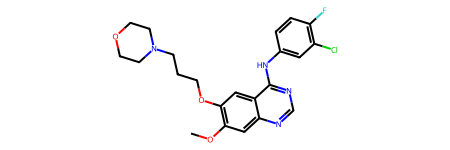

In [93]:
example_mol_obj

The object itself has several methods and attributes we can make use of; for example, we can now obtain the number of atoms in the molecule: 

In [94]:
example_mol_obj.GetNumAtoms()

31

Or its SMILES: 

In [95]:
example_mol_obj.smiles

'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1'

We can save the compound's image in a PNG file by using the function `save_molecule_image_to_file` and providing a filepath: 

In [96]:
rdkit.save_molecule_image_to_file(
    mol_obj=example_mol_obj, filepath=example_output_path / "gefitinib"
)

If we have a set of molecules that we want to visualize together, we can also use the `draw_molecules` function, which takes in a list of `rdkit.Chem.rdchem.Mol` objects as input.

The function has also several optional parameters that we can make use of:

* `list_legends`: list of legends for the structures to be used in the image.
* `mols_per_row`: number of molecules to be drawn per row
* `sub_img_size`: size of each structure
* `filepath`: if provided, the image will also be saved in the given filepath

To demonstrate the function, let's first create `rdkit.Chem.rdchem.Mol` objects for the analogs of Gefitinib we just obtained:

In [97]:
# create rdkit.Chem.rdchem.Mol objects from SMILES
# using the create_molecule_object function:
for compound in example_analogs:
    compound["MolObj"] = rdkit.create_molecule_object(
        input_type="smiles", input_value=compound["CanonicalSMILES"]
    )

example_analogs

[{'CID': 4680,
  'CanonicalSMILES': 'COC1=C(C=C(C=C1)CC2=NC=CC3=CC(=C(C=C32)OC)OC)OC',
  'Name': 'Papaverine',
  'MolObj': <rdkit.Chem.rdchem.Mol at 0x146dda810>},
 {'CID': 2247,
  'CanonicalSMILES': 'COC1=CC=C(C=C1)CCN2CCC(CC2)NC3=NC4=CC=CC=C4N3CC5=CC=C(C=C5)F',
  'Name': 'Astemizole',
  'MolObj': <rdkit.Chem.rdchem.Mol at 0x146dd8ba0>},
 {'CID': 237,
  'CanonicalSMILES': 'CCN(CC)CCCC(C)NC1=C2C=C(C=CC2=NC3=C1C=CC(=C3)Cl)OC',
  'Name': 'Quinacrine',
  'MolObj': <rdkit.Chem.rdchem.Mol at 0x146dda960>},
 {'CID': 3391107,
  'CanonicalSMILES': 'C1=CC(=CC=C1OC2=C3C(=CC(=CC3=NC=C2)Cl)Cl)F',
  'Name': 'Quinoxyfen',
  'MolObj': <rdkit.Chem.rdchem.Mol at 0x146dda880>},
 {'CID': 3081361,
  'CanonicalSMILES': 'CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C=C4)Br)F)OC',
  'Name': 'Vandetanib',
  'MolObj': <rdkit.Chem.rdchem.Mol at 0x146dda340>}]

Now we can visualize these compounds and their corresponding names in a single image (note that we have also provided a filepath, so the image will also be saved to disk):

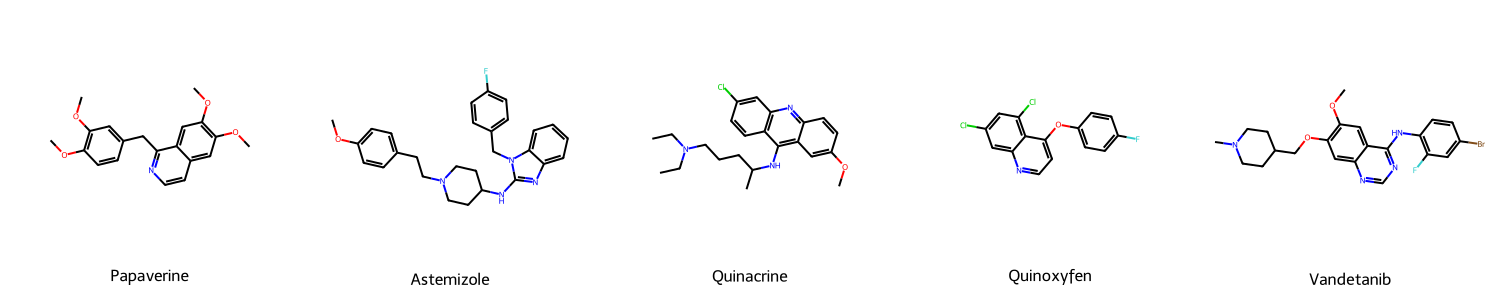

In [98]:
rdkit.draw_molecules(
    list_mol_objs=[compound["MolObj"] for compound in example_analogs],
    list_legends=[compound["Name"] for compound in example_analogs],
    mols_per_row=5,
    sub_img_size=(300, 300),
    filepath=example_output_path / "analogs",
)

The `calculate_similarity_dice` function can be used to calculate the *Dice* similarity metric between two ligands using ECFP/*Morgan* fingerprints as the similarity measure. The return value is normalized to 1 (1 = 100% similarity, meaning the two compounds are identical) and rounded to two decimal places. The function also provides optional parameters to modify the radius (default: 2) and the bit-vector size (default: 4096) of the generated fingerprints. 

Now let's calculate the similarity between Gefitinib and its analogs we just obtained: 

In [99]:
for compound in example_analogs:
    print(
        compound["Name"],
        rdkit.calculate_similarity_dice(mol_obj1=example_mol_obj, mol_obj2=compound["MolObj"]),
    )

Papaverine 0.34
Astemizole 0.32
Quinacrine 0.3
Quinoxyfen 0.29
Vandetanib 0.61


Notice that we queried *PubChem* for compounds with at least 70% similarity to Gefitinib. However, when we calculate the similarities, we see that they are mostly much lower than 70%. The reason is that *PubChem* uses a different similarity measure and metric than what we do here, i.e. a [custom substructure fingerprint](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) with the [*Tanimoto* similarity measure](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1).

Even if we slightly change the settings for generating the *Morgan* fingerprints, we see that we get different results as well:

In [100]:
for compound in example_analogs:
    print(
        compound["Name"],
        rdkit.calculate_similarity_dice(
            mol_obj1=example_mol_obj,
            mol_obj2=compound["MolObj"],
            morgan_radius=3,
            morgan_nbits=2048,
        ),
    )

Papaverine 0.28
Astemizole 0.27
Quinacrine 0.24
Quinoxyfen 0.24
Vandetanib 0.52


Our `rdkit` module also provide a function `calculate_druglikeness`, which can be used to obtain several molecular properties, along with four drug-likeness scores:

* `drug_score_lipinski`: based on [Lipinski's rule of 5](https://doi.org/10.1016/S0169-409X(96)00423-1), normalized to 1 (i.e. 4 = 1, 3 = 0.75, 2 = 0.5, 1 = 0.25, 0 = 0).

* `drug_score_custom`: Quantitative Estimate of Drug-likeness (QED) calculated by implementing functions that fit experimental data from [G. Bickerton *et al.*, *Nat. Chem* **2012**, 4(2), 90-98.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/).

* `drug_score_qed`:  QED [calculated by `RDKit`](https://www.rdkit.org/docs/source/rdkit.Chem.QED.html) using default parameters.

* `drug_score_total`: weighted average of the above three drug-likeness scores, with a ratio of 1:2:3, respectively.

In [101]:
rdkit.calculate_druglikeness(mol_obj=example_mol_obj)

{'mol_weight': 446.91,
 'num_H_acceptors': 7,
 'num_H_donors': 1,
 'logp': 4.28,
 'tpsa': 68.74,
 'num_rot_bonds': 8,
 'saturation': 0.36,
 'drug_score_qed': 0.52,
 'drug_score_lipinski': 1.0,
 'drug_score_custom': 0.56,
 'drug_score_total': 0.61}

Lastly, we can use the `save_3D_molecule_to_SDfile` function which prepares a molecule for docking calcluations i.e. adds hydrogen atoms, creates 3D conformation, runs energy minimizations, and saves the result as an SDF file:

In [102]:
rdkit.save_3D_molecule_to_SDfile(
    mol_obj=example_mol_obj, filepath=example_output_path / "gefitinib"
)

<a id='dogsitescorer_demo'></a>

### Demonstration of the `dogsitescorer` helper module

This module implements the [API](https://proteins.plus/help/dogsite_rest) of the [*DoGSiteScorer*](https://doi.org/10.1021/ci200454v) functionality of the [*ProteinsPlus*](https://doi.org/10.1093/nar/gkx333) [webserver](https://proteins.plus/). It can be used to submit protein binding site detection jobs and process the results in order to select a suitable binding site in the target protein. The functions here are used in the `BindingSiteDetection` class of the pipeline.

In [103]:
from utils.helpers import dogsitescorer

To submit a binding site detection job, we can use the function `submit_job` by providing a valid PDB-code.  

In [104]:
example_binding_site_data = dogsitescorer.submit_job(
    pdb_id="3W32",
    ligand_id="W32_A_1101",
    chain_id="A",
)
example_binding_site_data

lig_cov  poc_cov    lig_name   volume  enclosure  surface  depth  \
name                                                                      
P_0      85.48    31.22  W32_A_1101  1422.66       0.10  1673.75  19.26   
P_0_0    85.48    73.90  W32_A_1101   599.23       0.06   540.06  17.51   
P_0_1     3.23     0.44  W32_A_1101   201.73       0.08   381.07  11.36   
P_0_2     0.00     0.00  W32_A_1101   185.60       0.17   282.00   9.35   
P_0_3     6.45     0.29  W32_A_1101   175.30       0.15   297.42   9.29   
P_0_4     0.00     0.00  W32_A_1101   170.37       0.08   390.10  11.99   
P_0_5     0.00     0.00  W32_A_1101    90.43       0.24   177.50   6.24   
P_1       0.00     0.00  W32_A_1101   708.99       0.13  1030.19  14.32   
P_1_0     0.00     0.00  W32_A_1101   496.90       0.11   739.17  12.72   
P_1_1     0.00     0.00  W32_A_1101   212.10       0.16   454.31  11.03   
P_2       0.00     0.00  W32_A_1101   286.21       0.18   462.29  11.83   
P_2_0     0.00     0.00  W32_A_1101   148.16       0.15   271.11  10.75   
P_2_1     0.00     0.00  W32_A_1101   138.05       0.20   320.52   7.29   
P_3       0.00     0.00  W32_A_1101   244.16       0.04   514.94  14.34   
P_4       0.00     0.00  W32_A_1101   169.28       0.21   373.47  11.49   
P_4_0     0.00     0.00  W32_A_1101   108.35       0.22   237.70   7.50   
P_4_1     0.00     0.00  W32_A_1101    60.93       0.20   193.96   5.80   
P_5       0.00     0.00  W32_A_1101   166.59       0.16   347.46  11.99   
P_6       0.00     0.00  W32_A_1101   155.14       0.00   146.79  11.39   
P_7       0.00     0.00  W32_A_1101   116.03       0.27   227.72   8.04   
P_8       0.00     0.00  W32_A_1101   105.98       0.23   206.04  10.16   
P_9       0.00     0.00  W32_A_1101   104.32       0.09   202.13   9.20   

       surf/vol lid/hull ellVol  ...  PRO  SER  THR  TRP  TYR  VAL  \
name                             ...                                 
P_0    1.176493        -      -  ...    3    1    2    1    1    5   
P_0_0  0.901257        -      -  ...    1    0    2    0    0    2   
P_0_1  1.889010        -      -  ...    0    0    1    0    0    1   
P_0_2  1.519397        -      -  ...    0    0    0    0    0    2   
P_0_3  1.696634        -      -  ...    1    1    0    0    0    1   
P_0_4  2.289722        -      -  ...    0    0    0    1    1    0   
P_0_5  1.962844        -      -  ...    1    0    0    0    0    2   
P_1    1.453039        -      -  ...    1    2    2    0    1    1   
P_1_0  1.487563        -      -  ...    1    2    2    0    1    1   
P_1_1  2.141961        -      -  ...    0    0    0    0    1    0   
P_2    1.615213        -      -  ...    2    0    1    0    1    3   
P_2_0  1.829846        -      -  ...    2    0    0    0    1    2   
P_2_1  2.321767        -      -  ...    1    0    1    0    0    1   
P_3    2.109027        -      -  ...    3    2    1    0    1    1   
P_4    2.206226        -      -  ...    2    0    1    0    0    0   
P_4_0  2.193816        -      -  ...    0    0    0    0    0    0   
P_4_1  3.183325        -      -  ...    2    0    1    0    0    0   
P_5    2.085719        -      -  ...    1    1    0    0    1    0   
P_6    0.946178        -      -  ...    1    3    1    2    1    2   
P_7    1.962596        -      -  ...    1    0    0    1    1    0   
P_8    1.944140        -      -  ...    2    0    0    1    1    0   
P_9    1.937596        -      -  ...    0    1    0    0    1    1   

       simpleScore  drugScore  \
name                            
P_0           0.63   0.810023   
P_0_0         0.59   0.620201   
P_0_1         0.17   0.174816   
P_0_2         0.13   0.195695   
P_0_3         0.13   0.168845   
P_0_4         0.15   0.223742   
P_0_5         0.00   0.165232   
P_1           0.46   0.755915   
P_1_0         0.49   0.465489   
P_1_1         0.19   0.242990   
P_2           0.09   0.537137   
P_2_0         0.06   0.278636   
P_2_1         0.05   0.244429   
P_3           0.12   0.572013 

Notice that the `submit_job` function can also take in a chain-ID to limit the detection on that specific chain, and a ligand-ID to also calculate the coverage of each detected binding site. However, the ligand-ID that *DoGSiteScorer* accepts has its own format and is not the same as the ligand-ID in the protein PDB file. 

Nevertheless, it follows the following format: (ligand-ID)\_(chain-ID)\_(ligand-residue-ID). When implementing the `BindingSiteDetection` class, we will circumvent this by automatically generating the *DogSiteScorer* ligand-ID from the normal ligand-ID so that the user does not have to manually look up and enter the ligand-ID in this specific format. 

If we want to detect the binding sites of a protein from a local PDB file, we should first upload the file to the *DogSiteScorer* webserver using the `upload_pdb_file` function; it returns a dummy PDB-code for the uploaded structure, which can be used in place of a valid PDB-code to submit a binding site detection job. For this, we will use the PDB file we downloaded earlier. 

*Note*: This process should take **about one minute** to complete. We recently experienced very long processing times, so the following line may raise `ValueError: Fetching results from DoGSiteScorer API failed`.

In [105]:
# NBVAL_SKIP
example_dummy_pdb_id = dogsitescorer.upload_pdb_file(filepath=example_downloaded_protein_filepath)

example_dummy_pdb_id

'3w32pdb9c756b72-e76a-4bef-8a68-2f8ae61f1453'

In [106]:
# NBVAL_SKIP
dogsitescorer.submit_job(pdb_id=example_dummy_pdb_id, ligand_id="W32_A_1101", chain_id="A").head()

lig_cov  poc_cov    lig_name   volume  enclosure  surface  depth  \
name                                                                      
P_0      85.48    31.22  W32_A_1101  1422.66       0.10  1673.75  19.26   
P_0_0    85.48    73.90  W32_A_1101   599.23       0.06   540.06  17.51   
P_0_1     3.23     0.44  W32_A_1101   201.73       0.08   381.07  11.36   
P_0_2     0.00     0.00  W32_A_1101   185.60       0.17   282.00   9.35   
P_0_3     6.45     0.29  W32_A_1101   175.30       0.15   297.42   9.29   

       surf/vol lid/hull ellVol  ...  PRO  SER  THR  TRP  TYR  VAL  \
name                             ...                                 
P_0    1.176493        -      -  ...    3    1    2    1    1    5   
P_0_0  0.901257        -      -  ...    1    0    2    0    0    2   
P_0_1  1.889010        -      -  ...    0    0    1    0    0    1   
P_0_2  1.519397        -      -  ...    0    0    0    0    0    2   
P_0_3  1.696634        -      -  ...    1    1    0    0    0    1   

       simpleScore  drugScore  \
name                            
P_0           0.63   0.810023   
P_0_0         0.59   0.620201   
P_0_1         0.17   0.174816   
P_0_2         0.13   0.195695   
P_0_3         0.13   0.168845   

                                            pdb_file_url  \
name                                                       
P_0    https://proteins.plus/results/dogsite/2jmHJ6Su...   
P_0_0  https://proteins.plus/results/dogsite/2jmHJ6Su...   
P_0_1  https://proteins.plus/results/dogsite/2jmHJ6Su...   
P_0_2  https://proteins.plus/results/dogsite/2jmHJ6Su...   
P_0_3  https://proteins.plus/results/dogsite/2jmHJ6Su...   

                                           ccp4_file_url  
name                                                      
P_0    https://proteins.plus/results/dogsite/2jmHJ6Su...  
P_0_0  https://proteins.plus/results/dogsite/2jmHJ6Su...  
P_0_1  https://proteins.plus/results/dogsite/2jmHJ6Su...  
P_0_2  https://proteins.plus/results/dogsite/2jmHJ6Su...  
P_0_3  https://proteins.plus/results/dogsite/2jmHJ6Su...  

[5 rows x 51 columns]

The `submit_job` function returns a DataFrame containing all the detected binding pockets and their respective properties. It also contains the URLs of the PDB and CCP4 files for each of the detected binding pockets, which can be used to download the files later. 

Among the calculated properties, the most important are (for more details, see [A. Volkamer *et al.*, *J. Chem. Inf. Model.* **2012**, *52*, 360-372.](https://doi.org/10.1021/ci200454v)):

* druggability scores (between 0 and 1; the higher the score the more druggable the binding site):
* `simpleScore`: simple druggability score, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure. 
* `drugScore`: druggability score derived by incorporation of a subset of meaningful descriptors in a support vector machine (libsvm).
* ligand coverage data (for when a ligand-ID is also specified in the job submission) 
* `lig_cov`: the percentage of the ligand volume that is covered by the pocket.
* `poc_cov`: percentage of the binding site volume that is covered by the ligand. 
* `volume`: volume of the pocket in Å<sup>3</sup>.

The list of all properties can be accessed by retrieving the column names of the DataFrame: 

In [107]:
example_binding_site_data.columns

Index(['lig_cov', 'poc_cov', 'lig_name', 'volume', 'enclosure', 'surface',
       'depth', 'surf/vol', 'lid/hull', 'ellVol', 'ell c/a', 'ell b/a',
       'siteAtms', 'accept', 'donor', 'hydrophobic_interactions',
       'hydrophobicity', 'metal', 'Cs', 'Ns', 'Os', 'Ss', 'Xs', 'negAA',
       'posAA', 'polarAA', 'apolarAA', 'ALA', 'ARG', 'ASN', 'ASP', 'CYS',
       'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO',
       'SER', 'THR', 'TRP', 'TYR', 'VAL', 'simpleScore', 'drugScore',
       'pdb_file_url', 'ccp4_file_url'],
      dtype='object')

Depending on the specifics of the project, these values can be used to select the most-suitable detected binding site. Here, we have implemented two possibilities for this selection process in the `select_best_pocket` function. 

The first option is to provide a list of properties in order of importance, based on which the binding site with the highest or lowest value is to be chosen. The function then returns the name of the selected binding site. 

The list of properties should be inputted as a list. For example, the `selection_criteria` argument below sorts the binding sites by their `lig_cov` values and if there are two or more binding sites with the same `lig_cov` value, it then sorts them by their `poc_cov` values:

In [108]:
example_best_pocket_name = dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="sorting",
    selection_criteria=["lig_cov", "poc_cov"],
    ascending=False,
)

example_best_pocket_name

'P_0_0'

Another possibility for selecting a binding site is to provide any valid Python expression that generates a list-like object with the same length as the number of detected binding sites. This Python expression is taken in as a string and evaluated during the runtime, so the user can directly input a Python expression in the input CSV file.

For example, using this method we can perform any calculation on the properties in the binding site dataframe. 

*Note*: for referring to the binding site dataframe, `df` should be used:

In [109]:
dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="((df['lig_cov'] + df['poc_cov']) / 2) * ((df['drugScore'] + df['simpleScore']) / 2) / df['volume']",
    ascending=False,
)

'P_0_0'

For example, the above `selection_criteria` is a function that calculates the average of `lig_cov` and `poc_cov`, as well as the average of `drugScore` and `simpleScore`, multiplies the two together and then divides the result by the `volume`. The binding site that has the highest value is then chosen. If we want to have the lowest value, we can set the `ascending` parameter to False.

Another example is:

In [110]:
dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="df[['drugScore', 'simpleScore']].min(axis=1) * df[['poc_cov', 'lig_cov']].max(axis=1)",
    ascending=False,
)

'P_0'

The above example calculates the minimum value between `drugScore` and `simpleScore`, and multiplies the results with the maximum value between the `poc_cov` and `lig_cov`. 
    
We now want to calculate the coordinates of the selected binding site to use in the docking process. For this, we first need to download the PDB files of the detected binding sites, using the `save_binding_sites_to_file` function. It files will be saved in the given `output_path` under the same name as their corresponding pocket:  

In [111]:
dogsitescorer.save_binding_sites_to_file(
    binding_site_df=example_binding_site_data, output_path=example_output_path
)

Having downloaded the necessary binding site files, we can now calculate the coordinates of the selected pocket by providing the `filepath` of its data (i.e `output_path` of the above function + selected pocket's name) to the `calculate_pocket_coordinates_from_pocket_pdb_file` function:

In [112]:
dogsitescorer.calculate_pocket_coordinates_from_pocket_pdb_file(
    filepath=example_output_path / example_best_pocket_name
)

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}

Lastly, we can also see which residues comprise a certain pocket by providing the pocket's downloaded PDB filepath to the function `get_pocket_residues`:

In [113]:
dogsitescorer.get_pocket_residues(
    pocket_pdb_filepath=example_output_path / example_best_pocket_name
)

residue_number residue_name
1              718          LEU
2              726          VAL
3              743          ALA
4              744          ILE
5              745          LYS
6              766          MET
7              769          VAL
8              775          CYS
9              776          ARG
10             777          LEU
11             788          LEU
12             789          ILE
13             790          THR
14             791          GLN
15             792          LEU
16             793          MET
17             794          PRO
18             796          GLY
19             797          CYS
20             841          ARG
21             842          ASN
22             844          LEU
23             854          THR
24             855          ASP
25             856          PHE
26             857          GLY
27             858          LEU
28             997          PHE
29            1001          LEU

<a id='obabel_demo'></a>

### Demonstration of the `obabel` helper module

Here you will find functions needed to prepare the protein and the ligand analogs for docking, e.g. by adding missing hydrogen atoms, defining protonation states based on a given pH value, determining partial charges, generating a low-energy conformation of ligands, and saving its coordinates as a PDBQT file. These are implemented with the help of [*pybel*](http://openbabel.org/docs/UseTheLibrary/Python_Pybel.html) module of the [*openbabel*](https://github.com/openbabel/openbabel/tree/master/scripts/python) package.

This helper module also provides functions for splitting multi-structure files, or merging several files into a multi-structure file. These are useful, e.g. for processing the docking output files later, and are used in the `Docking` and `InteractionAnalysis` classes of the pipeline.

In [114]:
from utils.helpers import obabel

The function `optimize_structure_for_docking` can be used to prepare a structure for docking. It takes in an `openbabel.pybel.Molecule` object, and modifies it in place to &mdash; depending on the specified parameters &mdash; add hydrogen atoms to the structure, correct the protonation state of each atom based on a given pH value, calculate partial charges, and generate a force-field-optimized 3D conformation.

However, unless you wish to work with your own `openbabel.pybel.Molecule` object, there is no need to use this function directly, as it is also implemented in the functions `create_pdbqt_from_smiles` and `create_pdbqt_from_pdb_file`.

Let's create a PDBQT file for Gefitinib from its SMILES:

In [115]:
obabel.create_pdbqt_from_smiles(
    smiles="COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4",
    pdbqt_path=example_output_path / "gefitinib",
)

And one for our extracted protein:

In [116]:
obabel.create_pdbqt_from_pdb_file(
    pdb_filepath=example_output_path / "extracted_protein.pdb",
    pdbqt_filepath=example_output_path / "extracted_protein.pdbqt",
)

Other functions in this module include `split_multistructure_file`, which allows you to split a multi-structure file (e.g. PDB, PDBQT, SDF) into several files of the same type, each containing a single structure. We will use this function in the [section](#plip_demo) demonstrating the `plip` helper module, to separate the docking poses of a ligand. Also, `merge_molecules_to_single_file` allows you to do the opposite.

<a id='smina_demo'></a>

### Demonstration of the `smina` helper module

This module is responsible for communicating with the [*Smina*](https://sourceforge.net/projects/smina/) program via shell commands, in order to perform docking calculations. It also contains a function to process the output log of the program and extract information. The module is used in the `Docking` class of the pipeline.

In [117]:
from utils.helpers import smina

In order to dock a ligand onto a specified pocket of a protein, we can use the function `dock`. For this, we have to provide the following parameters:

* `ligand_path`: filepath of the ligand PDBQT file.
* `protein_path`: filepath of the protein PDBQT file.
* `pocket_center`: xyz-coordinates of the pocket's center (as an iterable of three numbers).
* `pocket_size`: xyz-lenghts of the pocket (as an iterable of three numbers).
* `output_path`: filepath to save the docking poses in.

There are also several optional parameters that we can modify:

* `output_format`: file format corresponding to `output_path` (default: PDBQT).
* `num_poses`: maximum number of docking poses to generate (default: 10).
* `exhaustiveness`: exhaustiveness of the global search (roughy proportional to time), which influences the accuracy of the docking calculations (default: 10).
* `random_seed`: explicit seed phrase to make the docking results deterministic for reproducibility (default: None)
* `log`: whether to also write a log file in the same path as `output_path` (default: True) 

In [118]:
example_smina_output = smina.dock(
    ligand_path=example_output_path / "gefitinib.pdbqt",
    protein_path=example_output_path / "extracted_protein.pdbqt",
    pocket_center=[15.91, 32.33, 11.03],
    pocket_size=[24.84, 24.84, 24.84],
    output_path=example_output_path / "docking",
    output_format="pdbqt",
    num_poses=5,
    exhaustiveness=10,
    random_seed=1111,
    log=True,
)

example_smina_output

'   _______  _______ _________ _        _______ \n  (  ____ \\(       )\\__   __/( (    /|(  ___  )\n  | (    \\/| () () |   ) (   |  \\  ( || (   ) |\n  | (_____ | || || |   | |   |   \\ | || (___) |\n  (_____  )| |(_)| |   | |   | (\\ \\) ||  ___  |\n        ) || |   | |   | |   | | \\   || (   ) |\n  /\\____) || )   ( |___) (___| )  \\  || )   ( |\n  \\_______)|/     \\|\\_______/|/    )_)|/     \\|\n\n\nsmina is based off AutoDock Vina. Please cite appropriately.\n\nWeights      Terms\n-0.035579    gauss(o=0,_w=0.5,_c=8)\n-0.005156    gauss(o=3,_w=2,_c=8)\n0.840245     repulsion(o=0,_c=8)\n-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)\n-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)\n1.923        num_tors_div\n\nUsing random seed: 1111\n\n0%   10   20   30   40   50   60   70   80   90   100%\n|----|----|----|----|----|----|----|----|----|----|\n***************************************************\n\nmode |   affinity | dist from best mode\n     | (kcal/mol) | rmsd l.b.| rmsd u.b.\n----

Now to better analyze and process the docking results, we can use the function `convert_log_to_dataframe` to generate a dataframe from *Smina*'s output log:

In [119]:
example_docking_df = smina.convert_log_to_dataframe(example_smina_output)

example_docking_df

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
mode                                                     
1                   -9.5                         0.000   
2                   -9.5                         4.771   
3                   -9.5                         4.975   
4                   -9.5                         4.832   
5                   -9.4                         4.990   

      dist from best mode_rmsd_u.b  
mode                                
1                            0.000  
2                            8.253  
3                            8.688  
4                            8.620  
5                            8.827

<a id='plip_demo'></a>

### Demonstration of the `plip` helper module

Implemented in this module are the functions necessary for calculating protein&mdash;ligand interactions using the [*plip*](https://github.com/pharmai/plip) package, and analyzing the results. It is used in the class `InteractionAnalysis` of the pipeline.

In [120]:
from utils.helpers import plip

In order to analyze the interactions in the generated docking poses by `smina`, we first need to create PDB files containing the protein and a single docking pose. 

Since *Smina* generates a single multi-structure file containing all the docking poses, we first need to split this file. For this, we can use the `split_multistructure_file` of the `obabel` module we mentioned before. It splits the structures in the file into single-structure files of the same format, and returns the filepaths:

In [121]:
example_docking_poses_filepaths = obabel.split_multistructure_file(
    filetype="pdbqt", filepath=example_output_path / "docking.pdbqt"
)

example_docking_poses_filepaths

[PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/docking_1.pdbqt'),
 PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/docking_2.pdbqt'),
 PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/docking_3.pdbqt'),
 PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/docking_4.pdbqt'),
 PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/docking_5.pdbqt')]

Now for each docking pose we want to analyze, we need to create a protein-ligand complex as a PDB file. The function `create_protein_ligand_complex` does just that. Again, it returns the filepath of the created PDB file.

Let's use the first docking pose (i.e. `example_docking_poses_filepaths[0]`) to generate a complex:

In [122]:
example_complex_filepath = plip.create_protein_ligand_complex(
    protein_pdbqt_filepath=example_output_path / "extracted_protein.pdbqt",
    docking_pose_pdbqt_filepath=example_docking_poses_filepaths[0],
    ligand_id="Gefitinib",
    output_filepath=example_output_path / "protein_ligand_complex",
)

example_complex_filepath

PosixPath('/Volumes/T7/Projects/CADD/Repos/Forks/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/data/Outputs/Examples/protein_ligand_complex.pdb')

Now we can use the function `calculate_interactions` to analyze the protein-ligand interactions in this complex. The function returns a `dict`, where each key corresponds to a ligand, and its value is another `dict` containing the interaction data:

In [123]:
example_interactions = plip.calculate_interactions(pdb_filepath=example_complex_filepath)

example_interactions.keys()

dict_keys(['UNL:A:1'])

Since we only had one ligand in our complex, we are only interested in the inside `dict`:

In [124]:
example_interactions = example_interactions[list(example_interactions.keys())[0]]

This `dict`'s keys each correspond to a specific interaction type:

In [125]:
example_interactions.keys()

dict_keys(['hbond', 'hydrophobic', 'saltbridge', 'waterbridge', 'pistacking', 'pication', 'halogen', 'metal'])

These interactions types are implemented in the subclass `plip.Consts.InteractionTypes` as `Enum`:

In [126]:
list(plip.Consts.InteractionTypes)

[<InteractionTypes.H_BOND: 'hbond'>,
 <InteractionTypes.HYDROPHOBIC: 'hydrophobic'>,
 <InteractionTypes.SALT_BRIDGE: 'saltbridge'>,
 <InteractionTypes.WATER_BRIDGE: 'waterbridge'>,
 <InteractionTypes.PI_STACKING: 'pistacking'>,
 <InteractionTypes.PI_CATION: 'pication'>,
 <InteractionTypes.HALOGEN: 'halogen'>,
 <InteractionTypes.METAL: 'metal'>]

when using `Pybel` to create the protein PDBQT file for the docking experiment, the residue numbers are reset (i.e. start at 1). Since this PDBQT file is also used to create a PDB file for the protein&mdash;ligand complex that `PLIP` analyzes, the residue numbers in our interaction data are also affected.

To fix this before further processing the data, we use the function `correct_protein_residue_numbers` and provide the first residue number of our protein. This fixes all residue numbers in the interaction data in-place:

In [127]:
example_interactions = plip.correct_protein_residue_numbers(
    ligand_interaction_data=example_interactions, protein_first_residue_number=701
)

Now we can use the function `create_dataframe_of_ligand_interactions` to create a dataframe for each specific interaction type, by providing its `Enum`.

For example, to create a dataframe for hydrophobic interactions present in `example_interactions`:

In [128]:
plip.create_dataframe_of_ligand_interactions(
    ligand_interaction_data=example_interactions,
    interaction_type=plip.Consts.InteractionTypes.HYDROPHOBIC,
)

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  DIST  \
0    745     LYS        A          1         UNL            A  3.78   
1    844     LEU        A          1         UNL            A  3.80   
2    854     THR        A          1         UNL            A  3.77   

   LIGCARBONIDX  PROTCARBONIDX                    LIGCOO  \
0          3107           2552   (17.316, 31.803, 7.555)   
1          3088           3018  (16.981, 32.586, 13.478)   
2          3088           3065  (16.981, 32.586, 13.478)   

                    PROTCOO  
0   (20.007, 34.389, 8.138)  
1    (13.961, 30.7, 14.816)  
2  (16.714, 28.916, 12.649)

<a id='nglview_demo'></a>

### Demonstration of the `nglview` helper module

This module uses the [*NGLview*](http://nglviewer.org/nglview/latest/api.html) *Jupyter* widget to implement functions for visualization of protein related data, such as the protein structure itself, protein binding sites, docking poses inside the protein and their interactions with specific residues. It is used in several classes of the pipeline, e.g. `Protein`, `Docking` and `InteractionAnalysis`.

In [129]:
from utils.helpers import nglview

We can visualize a protein structure using its PDB-code or local PDB filepath, by using the function `protein`. If we provide an `output_image_filename`, a static image of the protein will also be downloaded:

In [130]:
nglview.protein(input_type="pdb_code", input_value="3w32")

NGLWidget()

The function `binding_site` can visualize a binding pocket in the protein. We must provide the protein structure (either as PDB-code or PDB file) and the CCP4 file describing the binding pocket (generated by *DoGSiteScorer*): 

In [131]:
nglview.binding_site(
    protein_input_type="pdb_code",
    protein_input_value="3W32",
    ccp4_filepath=example_output_path / example_best_pocket_name,
)

NGLWidget()

To view docking poses, we can use the function `docking`, which requires the following parameters:

* `protein_filepath`: filepath of the extracted protein structure used in docking.
* `list_docking_poses_filepaths`: list of filepaths for all docking poses to be viewed. Each file must contain a single docking pose.
* `list_docking_poses_labels`: list of labels for the provided docking poses to distinguish them in the generated menu.
* `list_docking_poses_affinities`: list of calculated binding affinities for the provided docking poses to add to the view.

In [132]:
view = nglview.docking(
    protein_filepath=example_output_path / "extracted_protein.pdb",
    list_docking_poses_filepaths=example_docking_poses_filepaths,
    list_docking_poses_labels=list(
        map((lambda index: "123631 - " + str(index)), example_docking_df.index.values)
    ),
    list_docking_poses_affinities=example_docking_df["affinity[kcal/mol]"].values,
)

Docking modes
(CID - mode)


AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

Similarly, we can use the function `interactions` to visualize the protein-ligand interactions in each docking pose. Here we should also provide the same parameters as in `nglview.docking`, with the addition of `list_docking_poses_plip_dicts`, which should be a list containing the interaction data for each docking pose created by `plip`:

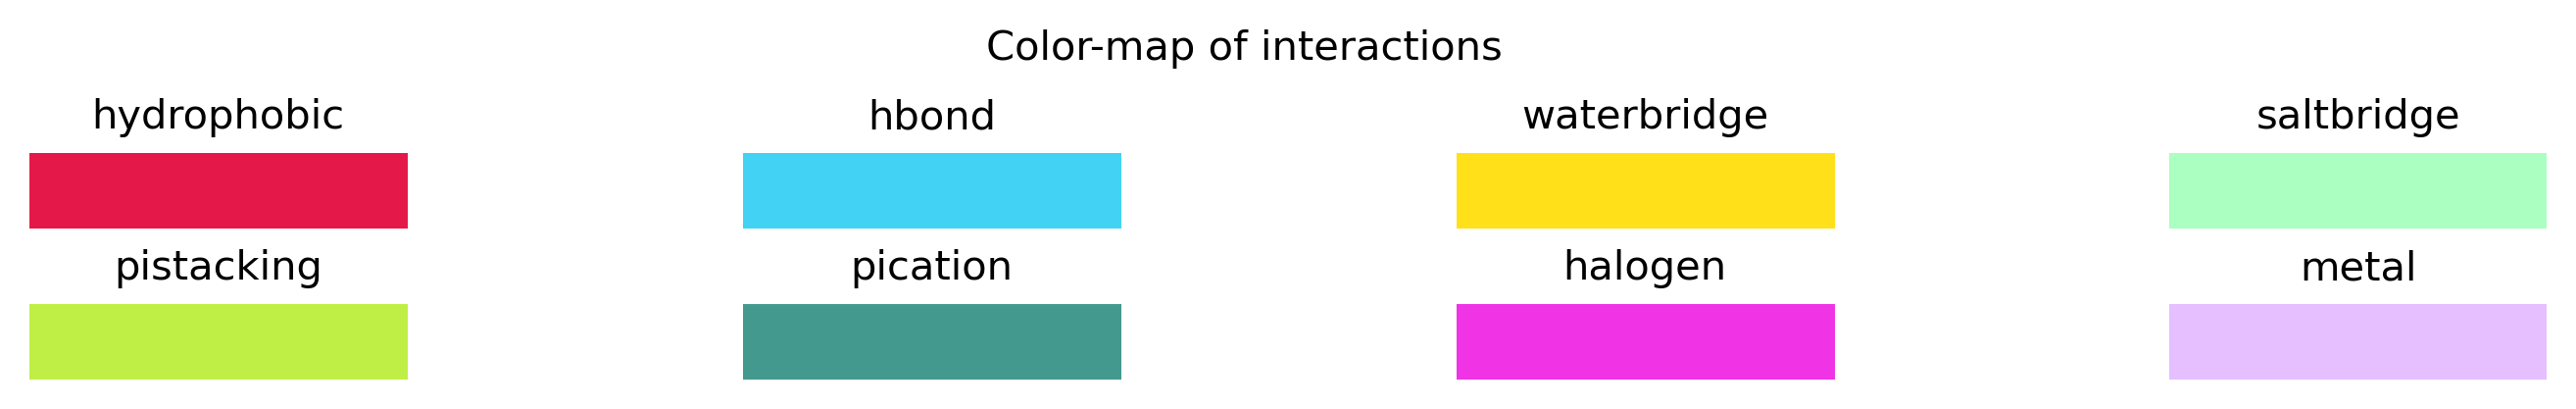

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

In [133]:
nglview.interactions(
    protein_filepath=example_output_path / "extracted_protein.pdb",
    list_docking_poses_filepaths=example_docking_poses_filepaths[0:1],
    list_docking_poses_labels=list(
        map((lambda index: "123631 - " + str(index)), example_docking_df.index.values)
    ),
    list_docking_poses_affinities=example_docking_df["affinity[kcal/mol]"].values,
    list_docking_poses_plip_dicts=[example_interactions],
)